**CLUSTERING** (reference: lab4)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# sklearn and scipy:
from scipy.stats import norm
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [3]:
# load in data
years = [2013, 2014, 2015, 2016, 2017, 2019]
data_by_year = {}

for year in years:
    filename = f"data_by_year/merged_data_{year}.csv"
    data_by_year[year] = pd.read_csv(filename, dtype={'CountyFIPS': str})


In [5]:
# Handle missing values
numeric_data_by_year = {}

for year, df in data_by_year.items():
    df_clean = df.dropna(axis=1, how='all')                  # remove fully empty columns
    numeric_cols = df_clean.select_dtypes(include='number').columns
    numeric_data_by_year[year] = df_clean[numeric_cols]

In [6]:
# Imputation
imputed_data_by_year = {}
imputer = KNNImputer(n_neighbors=5) # try different values here?

for year, df in numeric_data_by_year.items():
    imputed_array = imputer.fit_transform(df)
    imputed_data_by_year[year] = pd.DataFrame(imputed_array, columns=df.columns)

KeyboardInterrupt: 

In [ ]:
# Standardize Features
scaled_data_by_year = {}
scaler = StandardScaler()

for year, df in imputed_data_by_year.items():
    scaled_array = scaler.fit_transform(df)
    scaled_data_by_year[year] = pd.DataFrame(scaled_array, columns=df.columns)

In [ ]:
# PCA
pca_results = {}

for year, df in scaled_data_by_year.items():
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df)
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    # Keep CountyFIPS and Survey_Year from original df
    pca_df['CountyFIPS'] = data_by_year[year]['CountyFIPS'].values
    pca_df['Survey_Year'] = year
    pca_results[year] = pca_df

In [ ]:
# Clustering: K-means
cluster_results = {}

for year, df in scaled_data_by_year.items():
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    cluster_df = pd.DataFrame({
        'CountyFIPS': data_by_year[year]['CountyFIPS'].values,
        'Survey_Year': year,
        'Cluster': cluster_labels
    })
    cluster_results[year] = cluster_df


In [ ]:
# inspect results
# Example: PCA for 2014
pca_results[2014].head()

# Example: Clusters for 2014
cluster_results[2014].head()

In [ ]:
# visualization


In [3]:
# DBSCAN clustering for full dataset
data = pd.read_csv("data/clean/all_datasets_county_level_wide.csv", dtype={'CountyFIPS': str})

In [4]:
data.head()

CountyFIPS  Survey_Year  # of Food Insecure Children  \
0      01001         2014                       3190.0   
1      01001         2015                       2950.0   
2      01001         2016                       2760.0   
3      01001         2017                       2670.0   
4      01003         2014                      10270.0   

   # of Food Insecure Persons  % FI > High Threshold  % FI Btwn Thresholds  \
0                      7930.0                  0.356                 0.193   
1                      7680.0                  0.307                 0.221   
2                      7360.0                  0.339                 0.194   
3                      7270.0                  0.371                 0.144   
4                     26200.0                  0.354                 0.154   

   % FI ≤ Low Threshold  \
0                 0.451   
1                 0.472   
2                 0.467   
3                 0.485   
4                 0.492   

   % food insecure children in HH w/ HH incomes above 185 FPL  \
0                                               0.28            
1                                               0.27            
2                                               0.29            
3                                               0.34            
4                                               0.27            

   % food insecure children in HH w/ HH incomes below 185 FPL  ACCESS2  ...  \
0                                               0.72               NaN  ...   
1                                               0.73               NaN  ...   
2                                               0.71               NaN  ...   
3                                               0.66               NaN  ...   
4                                               0.73               NaN  ...   

   lasnaphalf  lasnaphalfshare  lawhite1  lawhite10  lawhite10share  \
0         NaN              NaN       NaN        NaN             NaN   
1         NaN              NaN       NaN        NaN             NaN   
2         NaN              NaN       NaN        NaN             NaN   
3         NaN              NaN       NaN        NaN             NaN   
4         NaN              NaN       NaN        NaN             NaN   

   lawhite1share  lawhite20  lawhite20share  lawhitehalf  lawhitehalfshare  
0            NaN        NaN             NaN          NaN               NaN  
1            NaN        NaN             NaN          NaN               NaN  
2            NaN        NaN             NaN          NaN               NaN  
3            NaN        NaN             NaN          NaN               NaN  
4            NaN        NaN             NaN          NaN               NaN  

[5 rows x 189 columns]

In [20]:
# subset only years 2014-2017
data_subset = data[(data["Survey_Year"] >= 2014) & (data["Survey_Year"] <= 2017)]

data_subset.head()

CountyFIPS  Survey_Year  # of Food Insecure Children  \
0      01001         2014                       3190.0   
1      01001         2015                       2950.0   
2      01001         2016                       2760.0   
3      01001         2017                       2670.0   
4      01003         2014                      10270.0   

   # of Food Insecure Persons  % FI > High Threshold  % FI Btwn Thresholds  \
0                      7930.0                  0.356                 0.193   
1                      7680.0                  0.307                 0.221   
2                      7360.0                  0.339                 0.194   
3                      7270.0                  0.371                 0.144   
4                     26200.0                  0.354                 0.154   

   % FI ≤ Low Threshold  \
0                 0.451   
1                 0.472   
2                 0.467   
3                 0.485   
4                 0.492   

   % food insecure children in HH w/ HH incomes above 185 FPL  \
0                                               0.28            
1                                               0.27            
2                                               0.29            
3                                               0.34            
4                                               0.27            

   % food insecure children in HH w/ HH incomes below 185 FPL  ACCESS2  ...  \
0                                               0.72               NaN  ...   
1                                               0.73               NaN  ...   
2                                               0.71               NaN  ...   
3                                               0.66               NaN  ...   
4                                               0.73               NaN  ...   

   lasnaphalf  lasnaphalfshare  lawhite1  lawhite10  lawhite10share  \
0         NaN              NaN       NaN        NaN             NaN   
1         NaN              NaN       NaN        NaN             NaN   
2         NaN              NaN       NaN        NaN             NaN   
3         NaN              NaN       NaN        NaN             NaN   
4         NaN              NaN       NaN        NaN             NaN   

   lawhite1share  lawhite20  lawhite20share  lawhitehalf  lawhitehalfshare  
0            NaN        NaN             NaN          NaN               NaN  
1            NaN        NaN             NaN          NaN               NaN  
2            NaN        NaN             NaN          NaN               NaN  
3            NaN        NaN             NaN          NaN               NaN  
4            NaN        NaN             NaN          NaN               NaN  

[5 rows x 189 columns]

In [31]:
num_counties = len(pd.unique(data_subset['CountyFIPS']))

# % missing in original data
na_percent_original = data.isna().mean() * 100

# % missing in subset
na_percent_subset = data_subset.isna().mean() * 100

# Combine into a single DataFrame
na_change = pd.DataFrame({
    'Original_%NA': na_percent_original,
    'Subset_%NA': na_percent_subset
})

# Compute change (subset - original)
na_change['Change_%NA'] = na_change['Subset_%NA'] - na_change['Original_%NA']

# Sort by largest increase in missingness
na_change_sorted = na_change.sort_values('Change_%NA', ascending=False)

na_change_sorted.head(20)


Original_%NA  Subset_%NA  Change_%NA
LAhalfand10              94.881474   97.302673      2.4212
LATracts10               94.881474   97.302673      2.4212
LATracts1                94.881474   97.302673      2.4212
LAPOP1_20                94.881474   97.302673      2.4212
LAPOP1_10                94.881474   97.302673      2.4212
LALOWI05_10              94.881474   97.302673      2.4212
LILATracts_Vehicle       94.881474   97.302673      2.4212
LILATracts_1And20        94.881474   97.302673      2.4212
LILATracts_1And10        94.881474   97.302673      2.4212
LILATracts_halfAnd10     94.881474   97.302673      2.4212
MedianFamilyIncome       94.881474   97.302673      2.4212
NUMGQTRS                 94.881474   97.302673      2.4212
LowIncomeTracts          94.881474   97.302673      2.4212
LATracts20               94.881474   97.302673      2.4212
LATractsVehicle_20       94.881474   97.302673      2.4212
LATracts_half            94.881474   97.302673      2.4212
LAPOP05_10               94.881474   97.302673      2.4212
LA1and20                 94.881474   97.302673      2.4212
LA1and10                 94.881474   97.302673      2.4212
HUNVFlag                 94.881474   97.302673      2.4212

In [21]:
# imputation
# use SimpleImputer to impute numeric columns of 'data' (do not pass data to the constructor)
imputer_simple = SimpleImputer(strategy='mean')
numeric_cols = data_subset.select_dtypes(include='number').columns

# fit/transform numeric columns and put results back into a copy of the original dataframe
imputed_array = imputer_simple.fit_transform(data_subset[numeric_cols])
imputed_data = data_subset.copy()
imputed_data[numeric_cols] = imputed_array

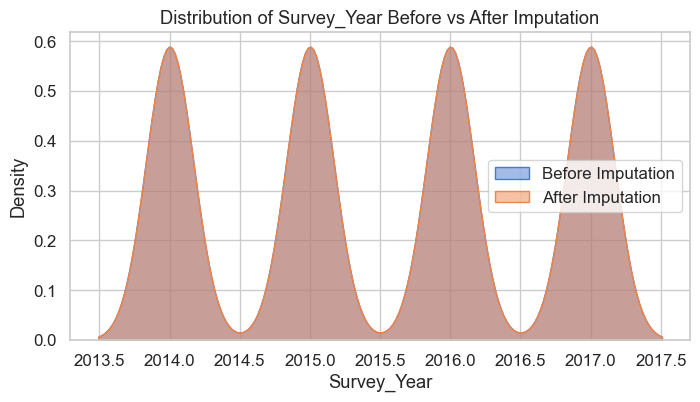

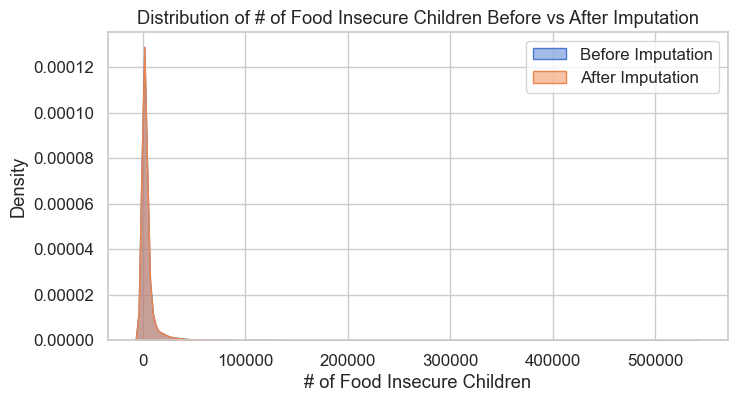

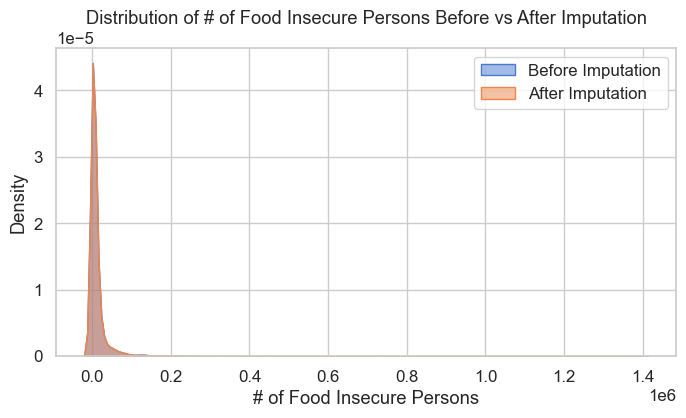

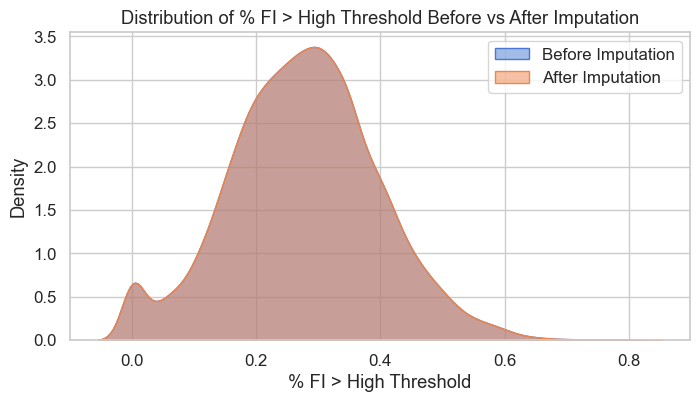

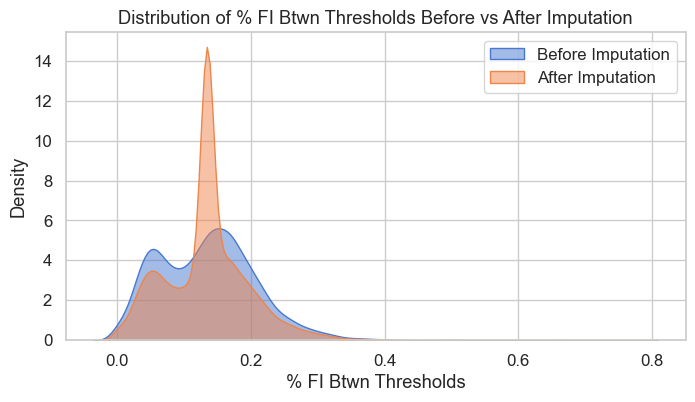

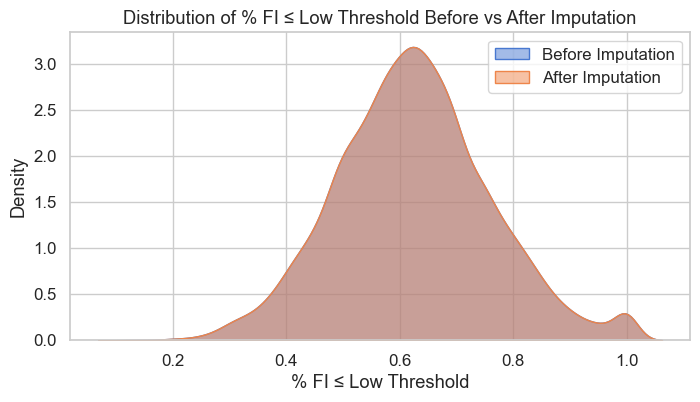

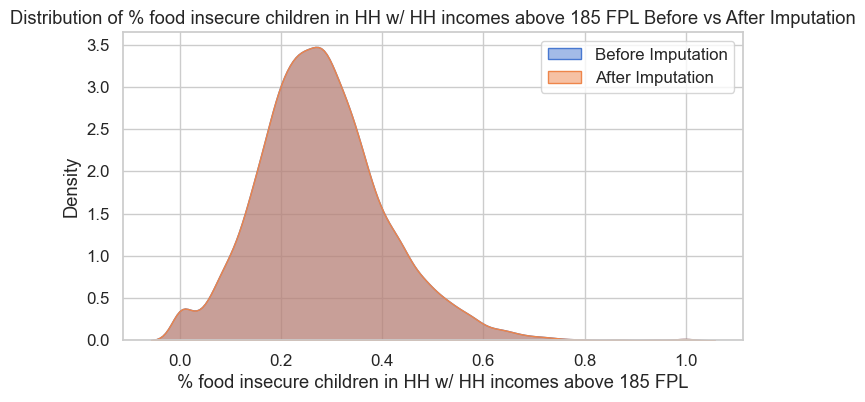

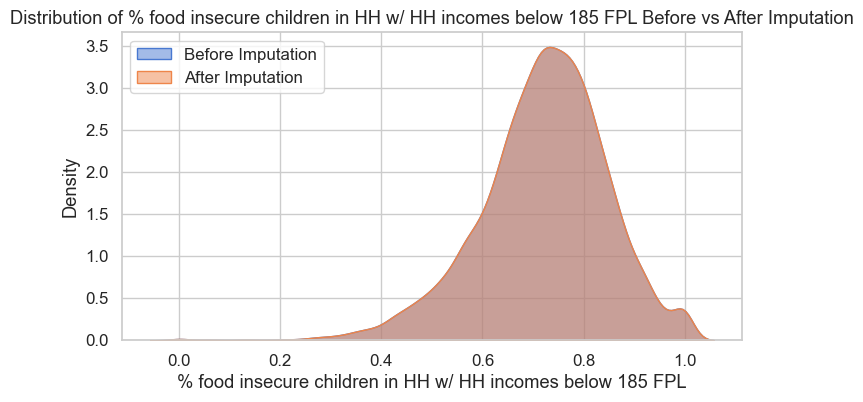

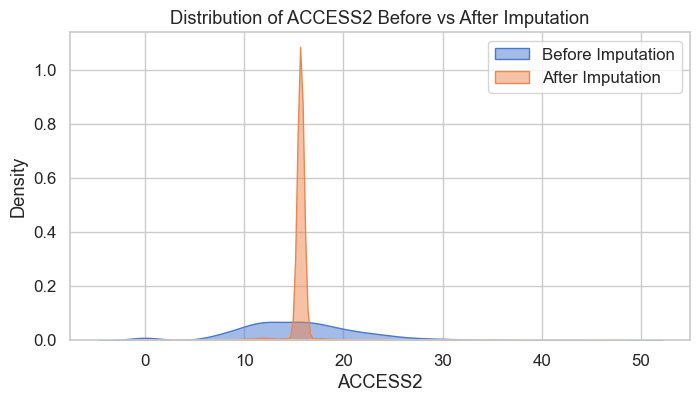

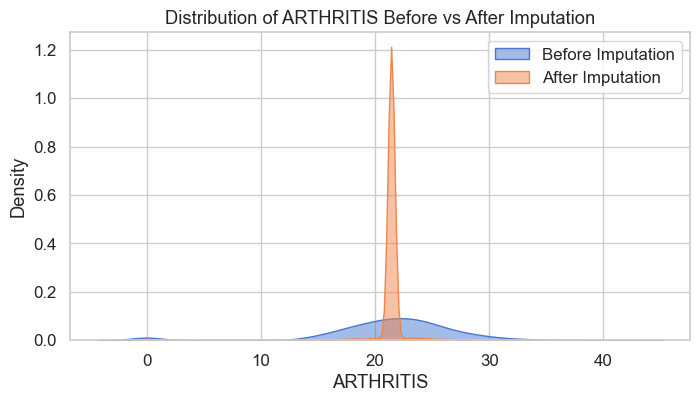

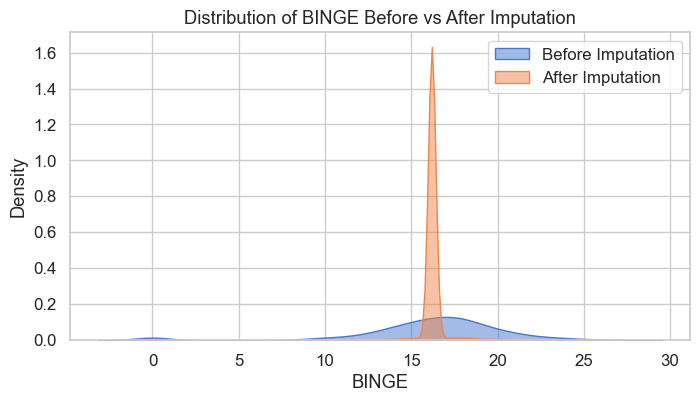

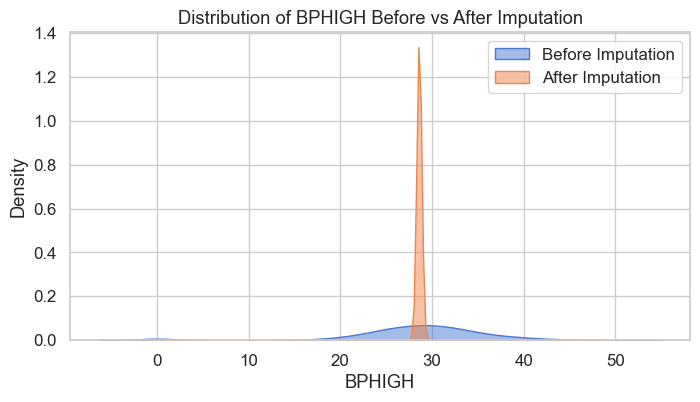

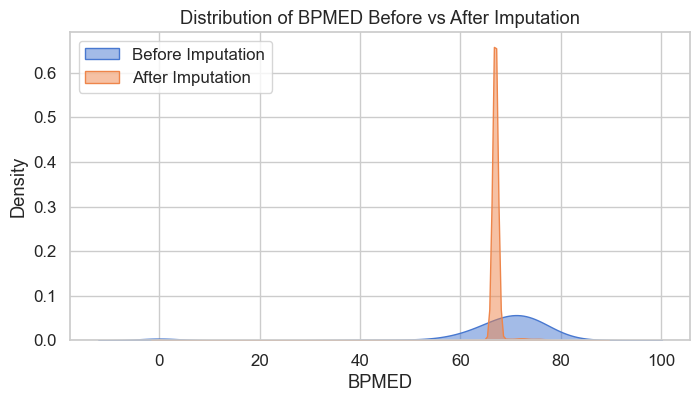

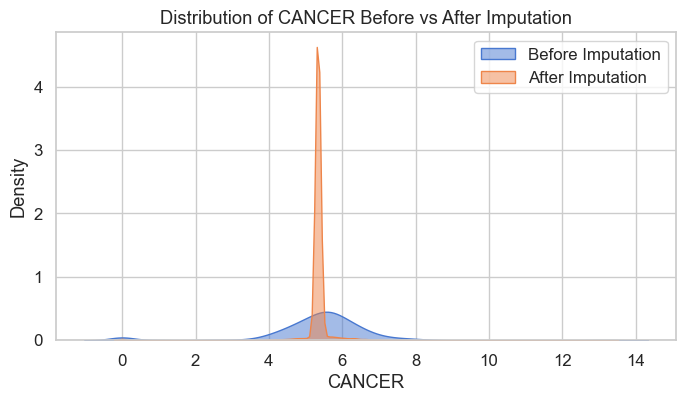

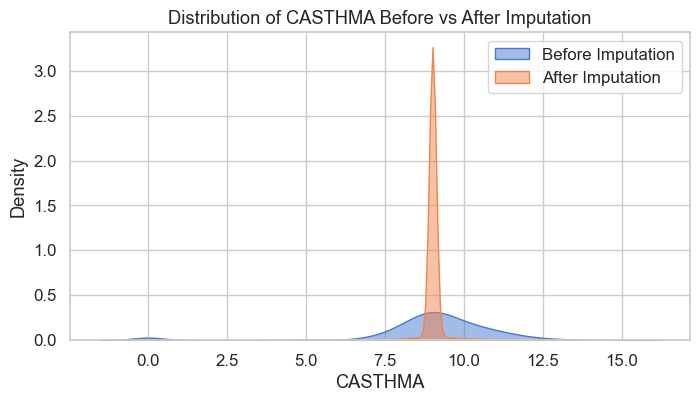

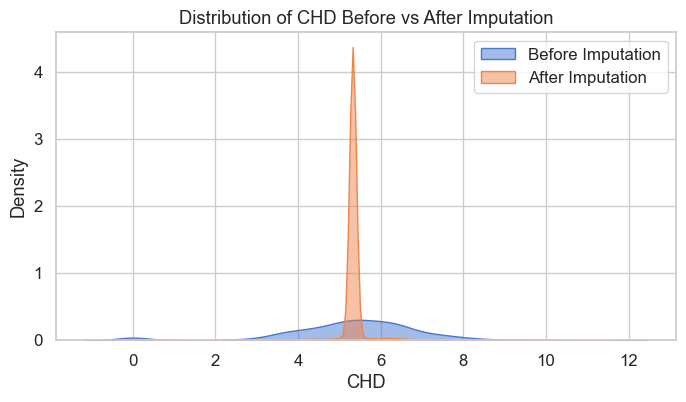

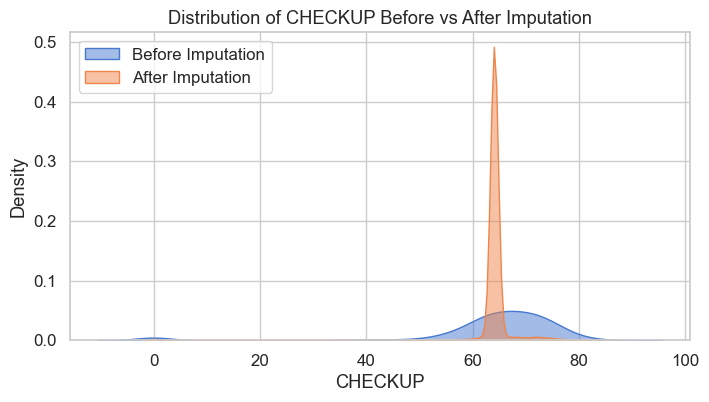

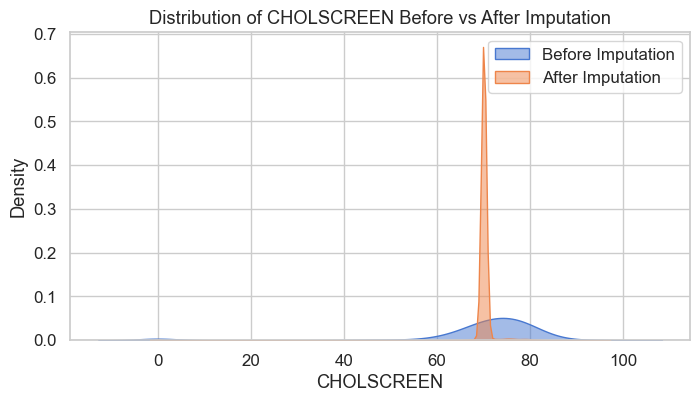

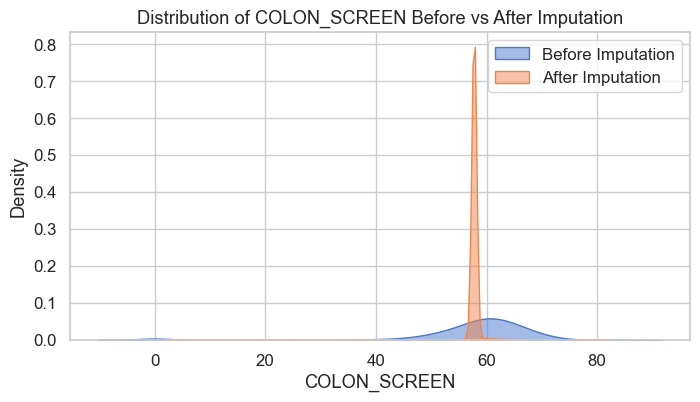

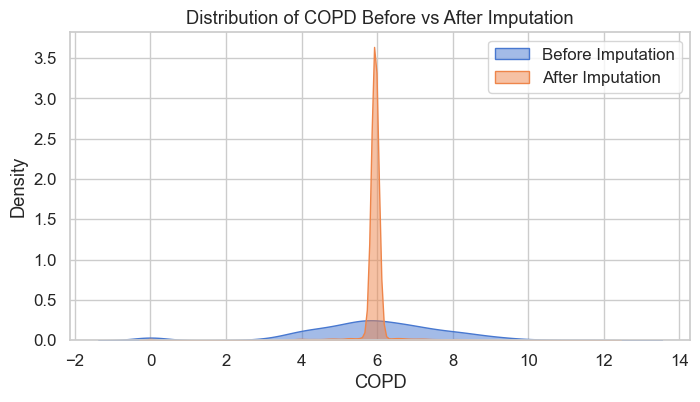

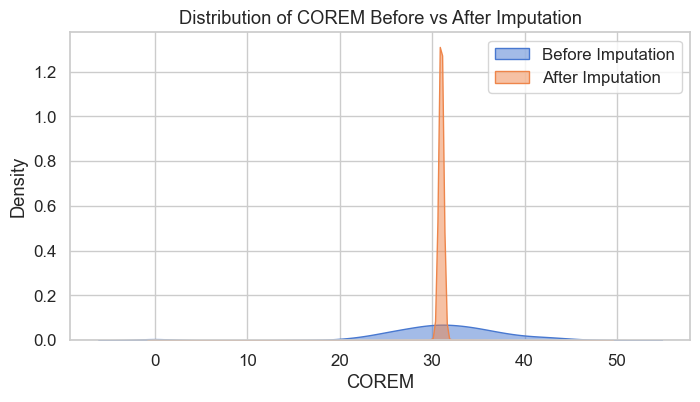

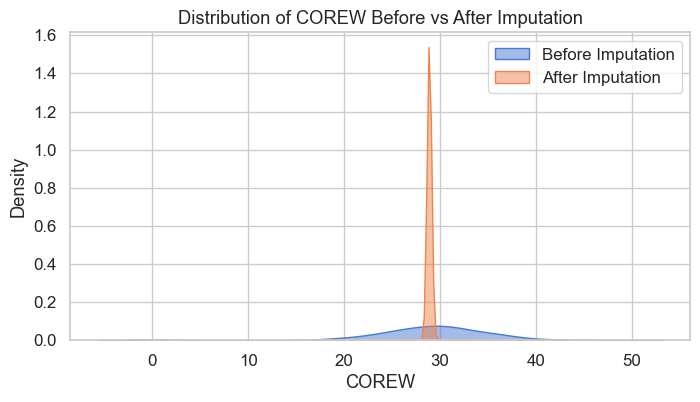

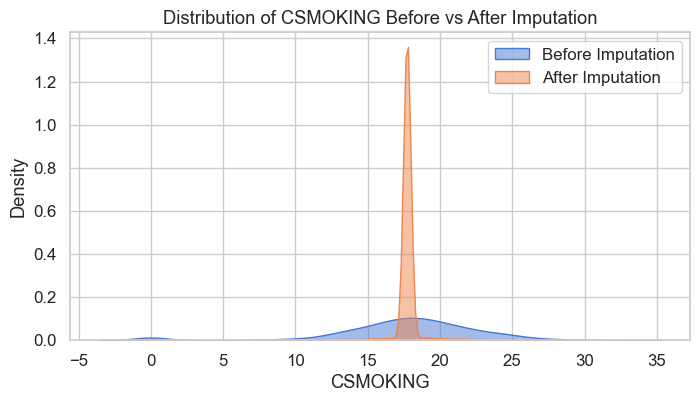

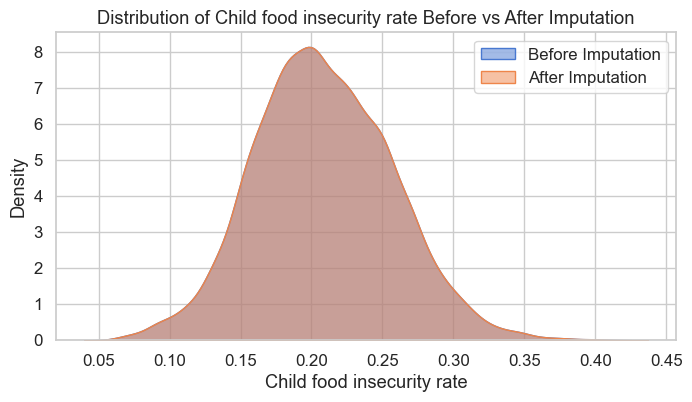

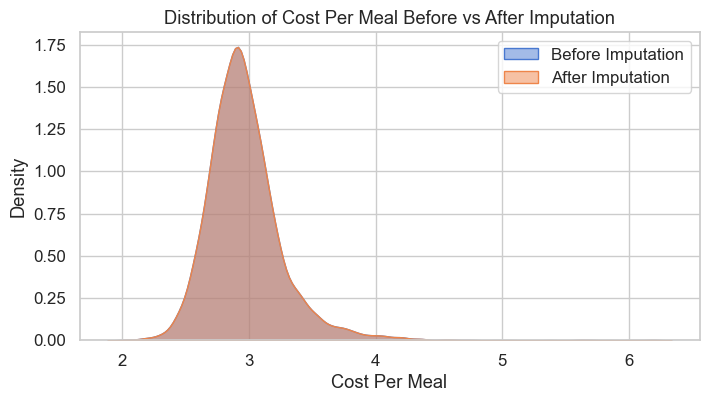

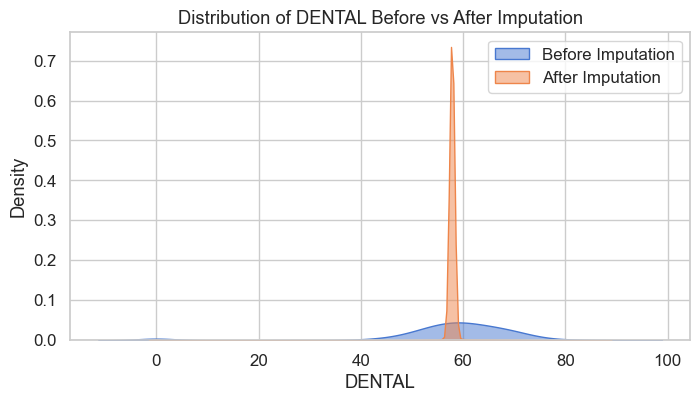

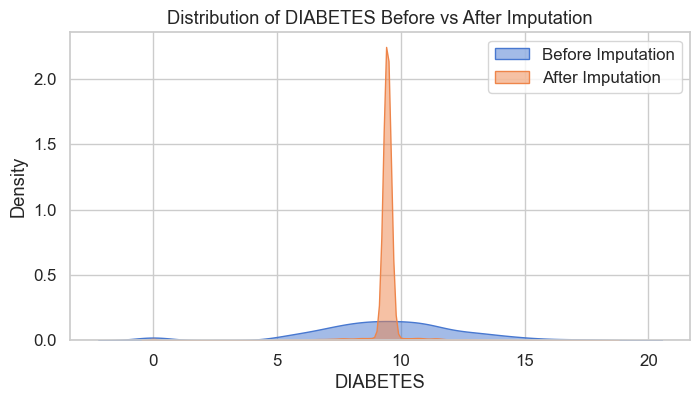

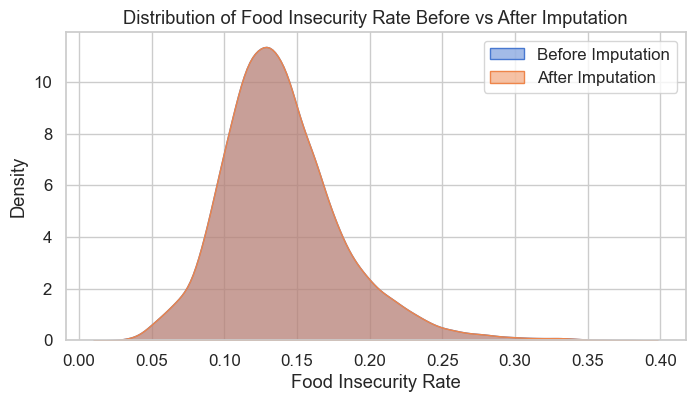

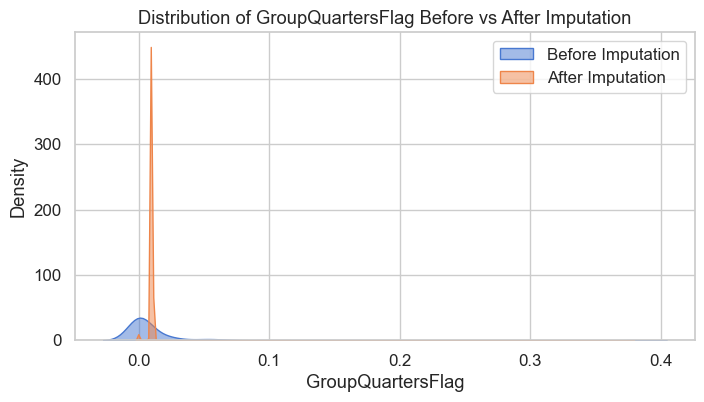

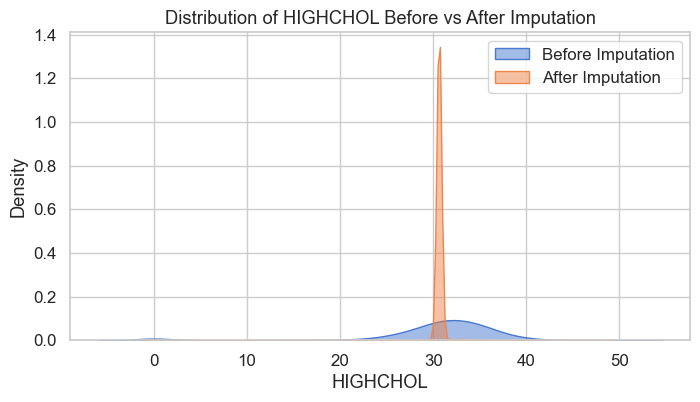

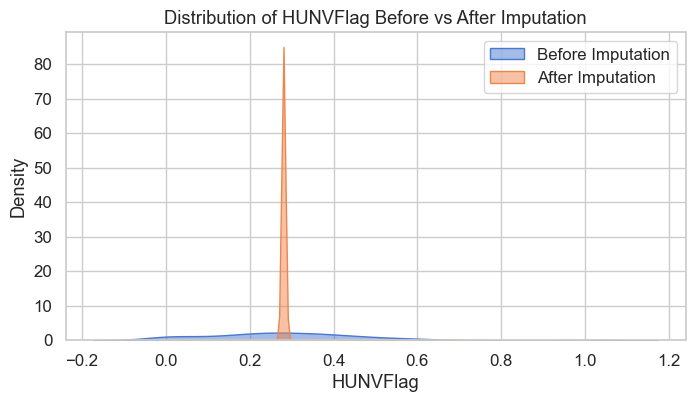

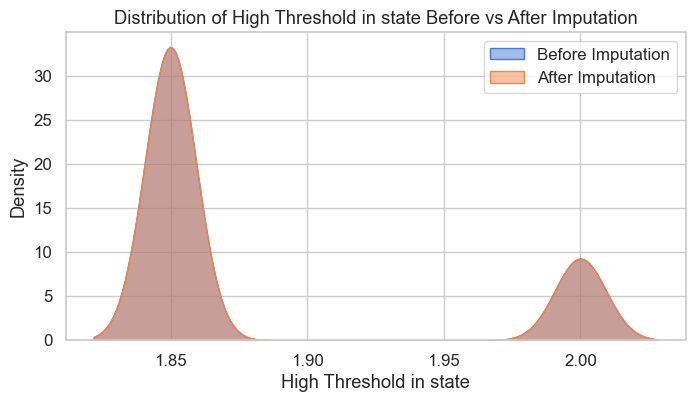

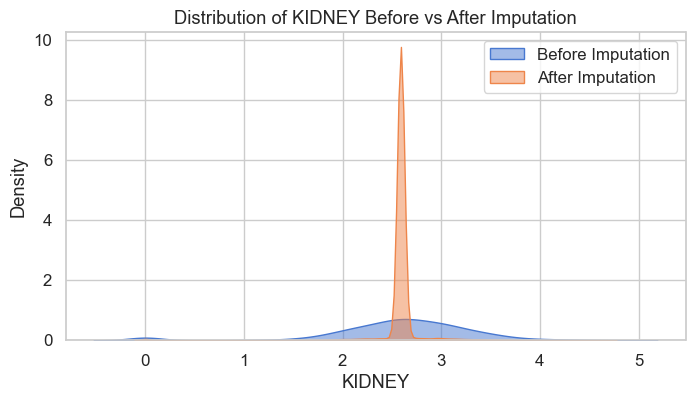

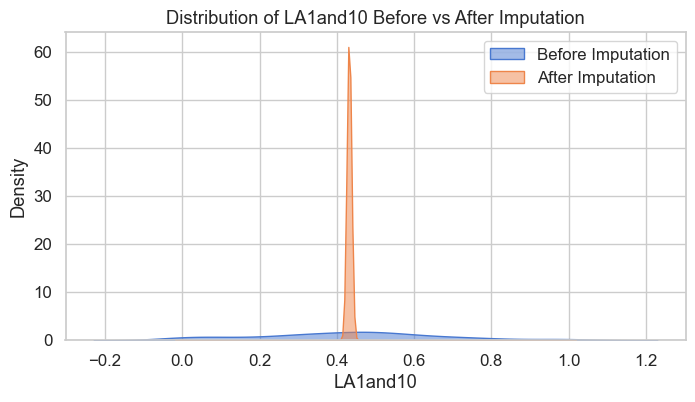

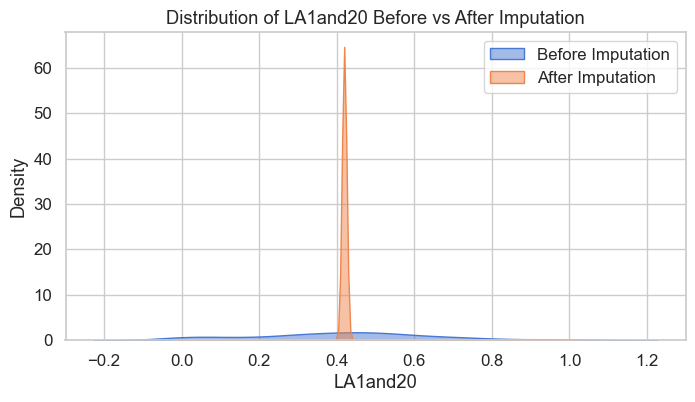

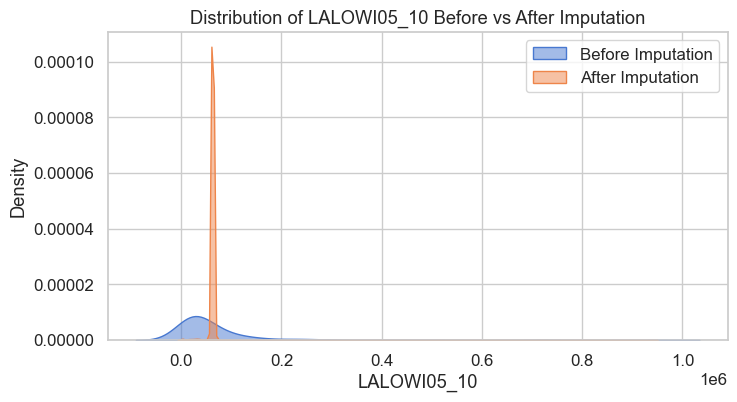

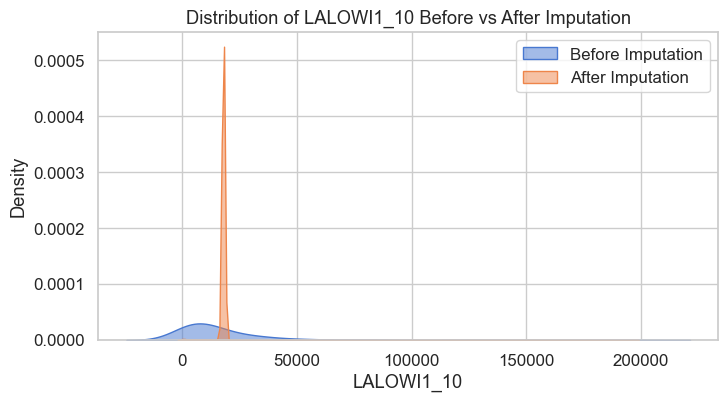

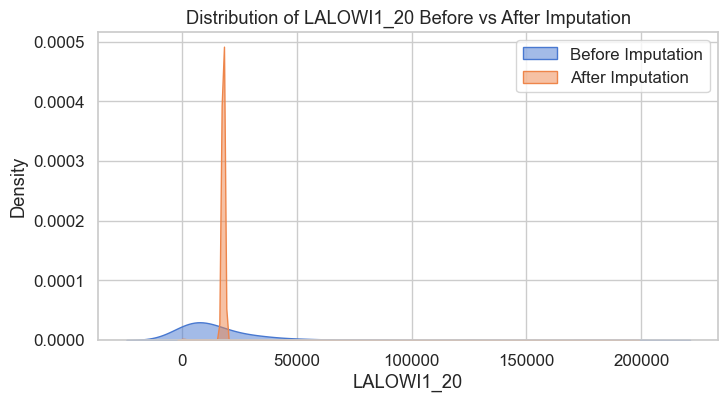

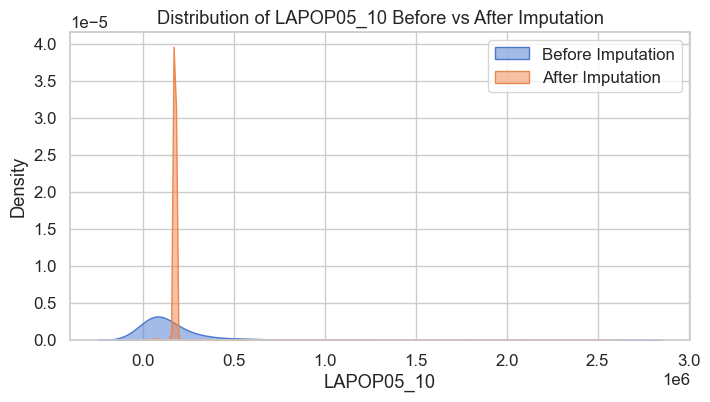

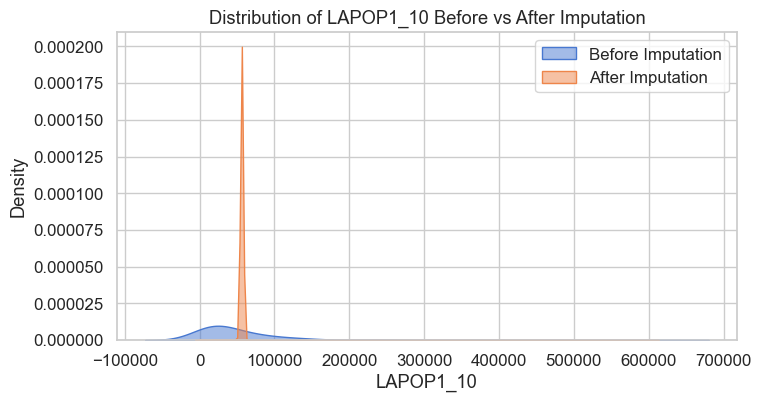

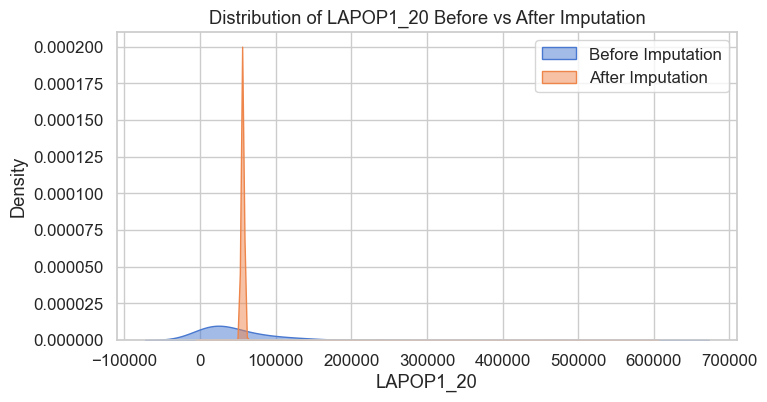

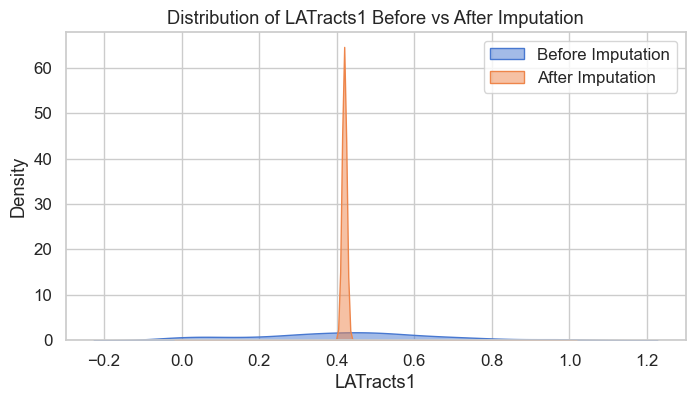

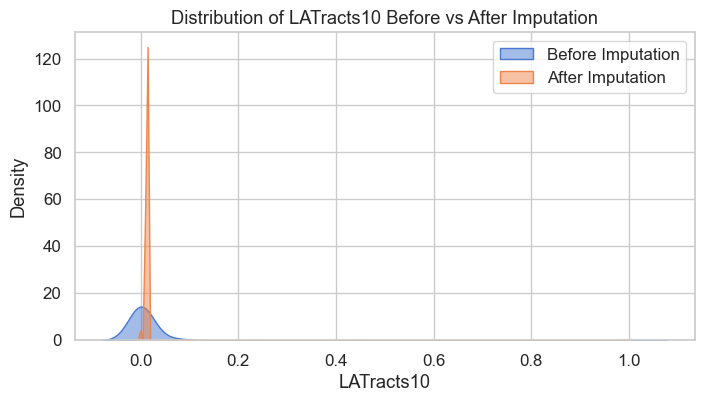

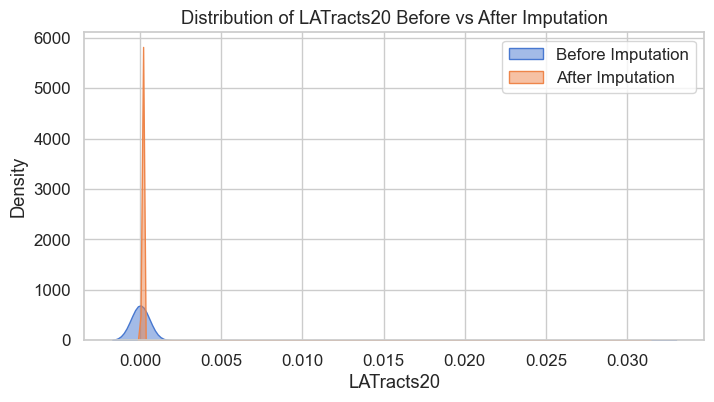

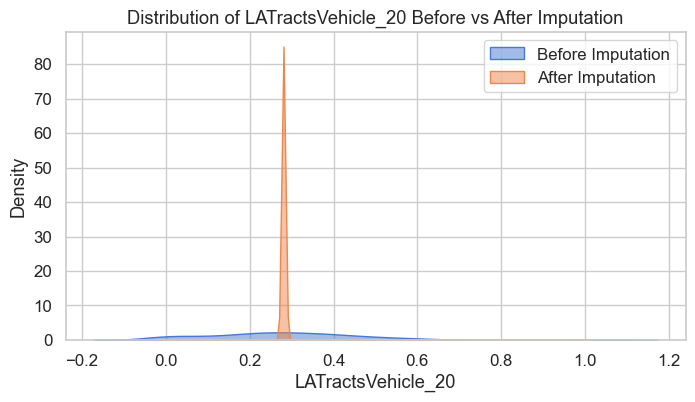

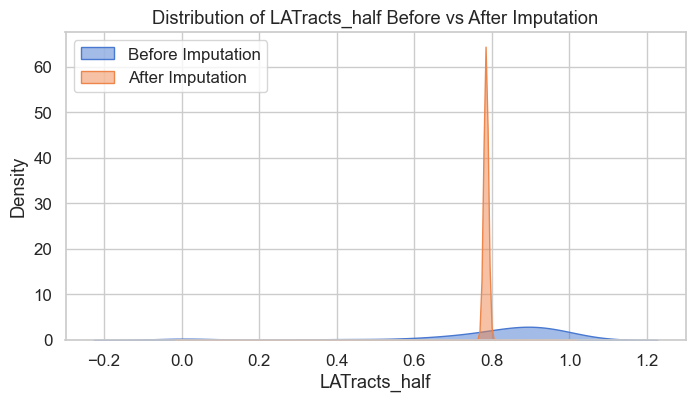

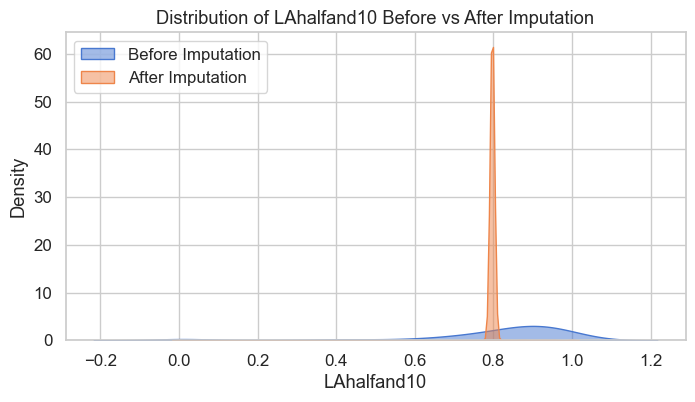

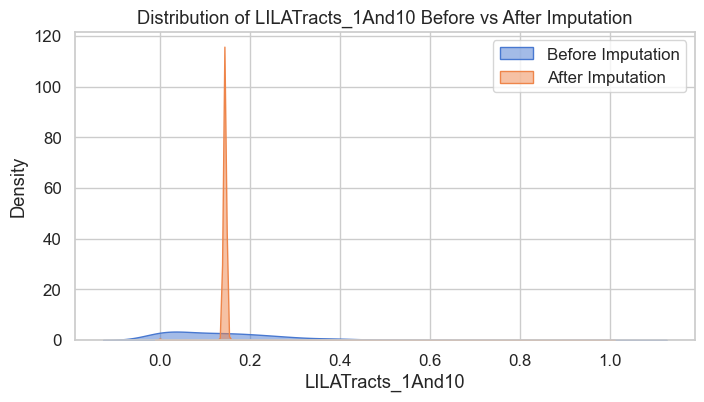

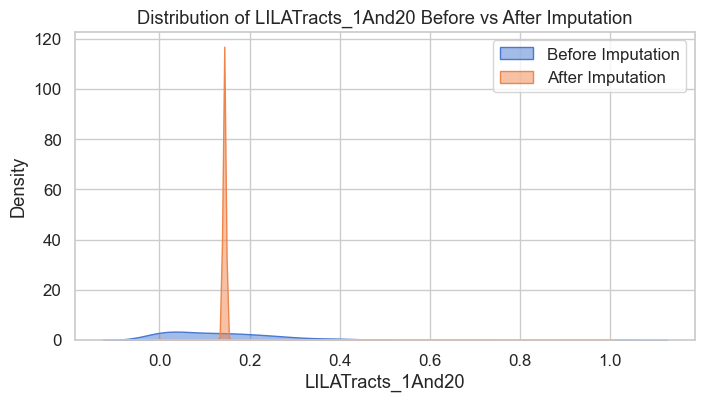

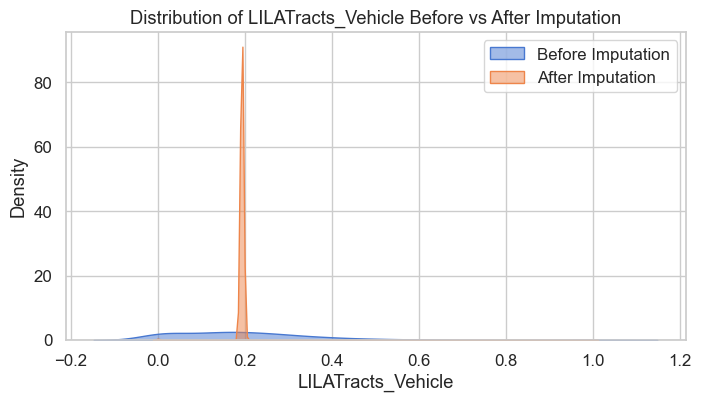

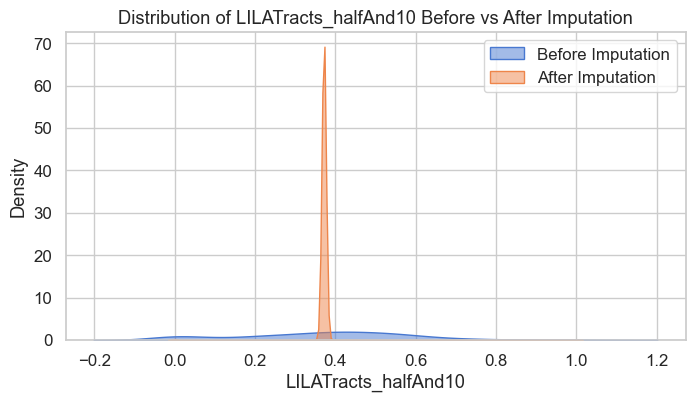

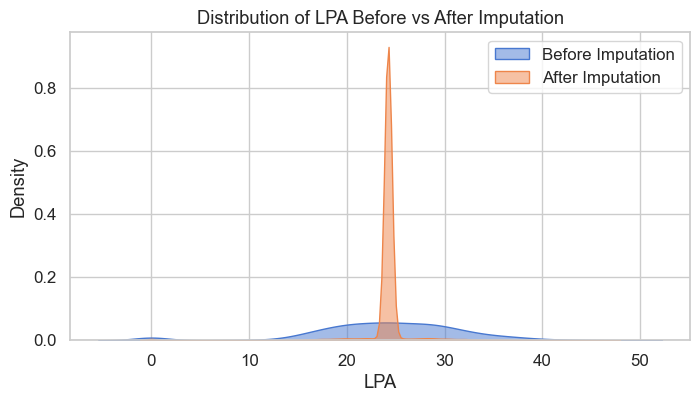

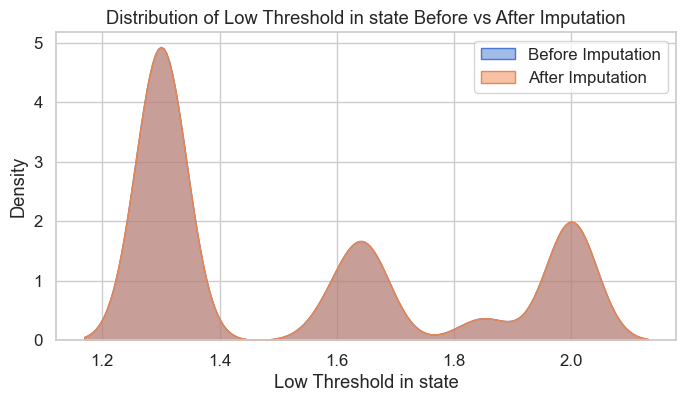

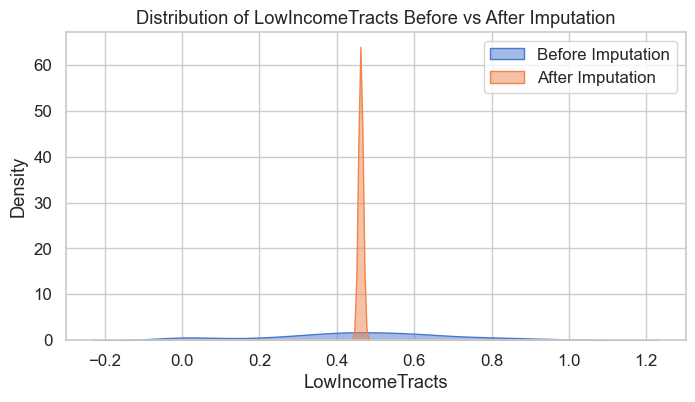

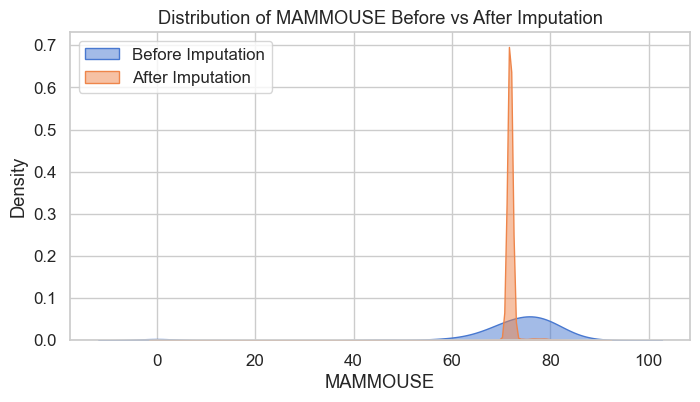

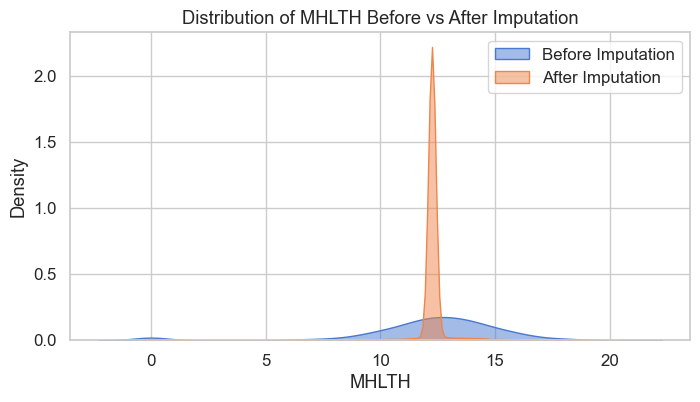

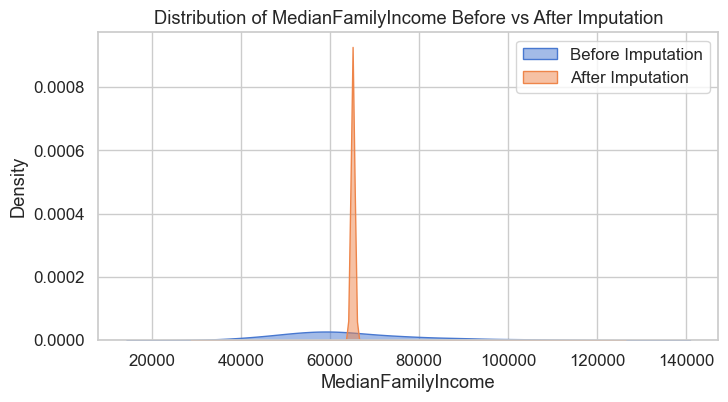

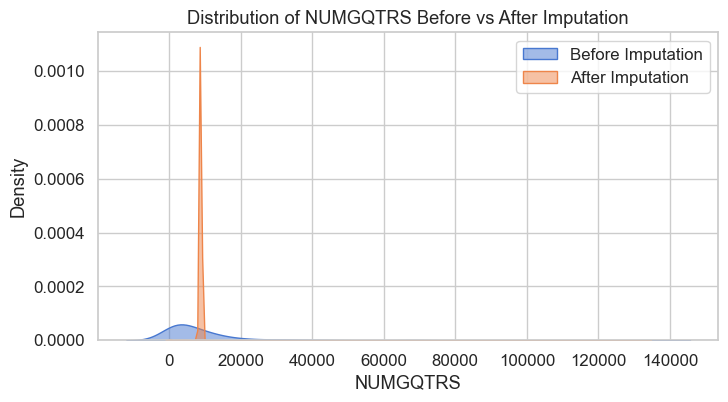

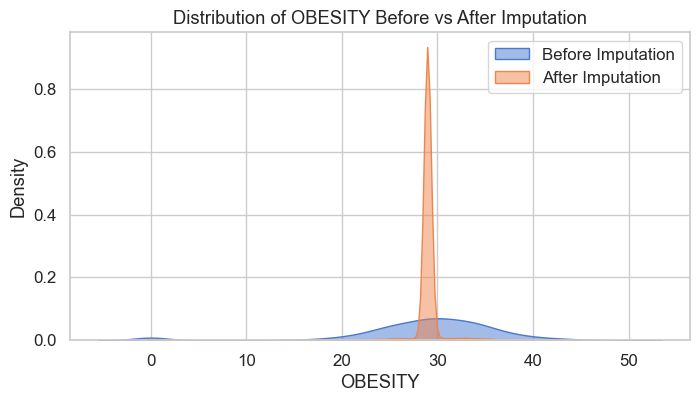

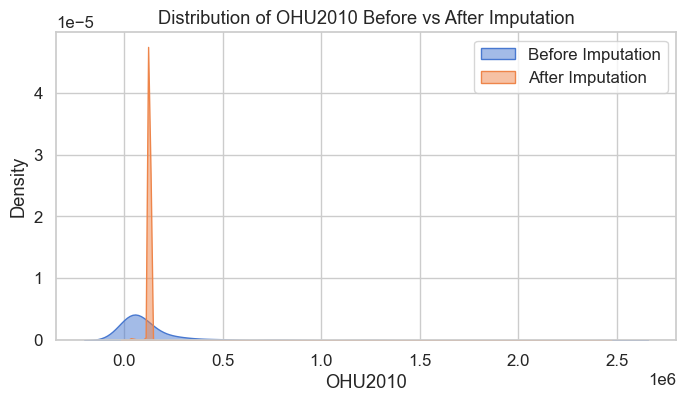

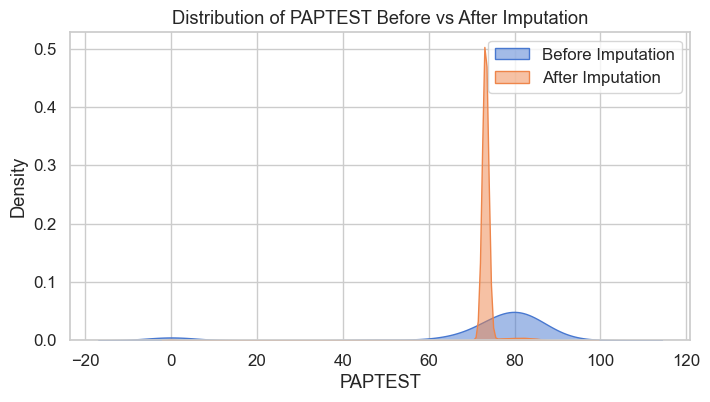

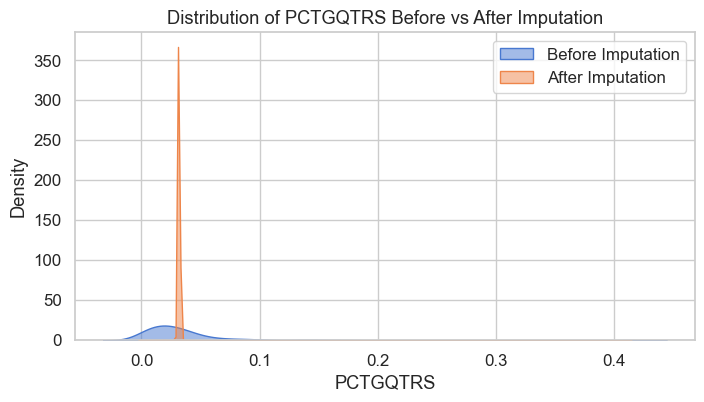

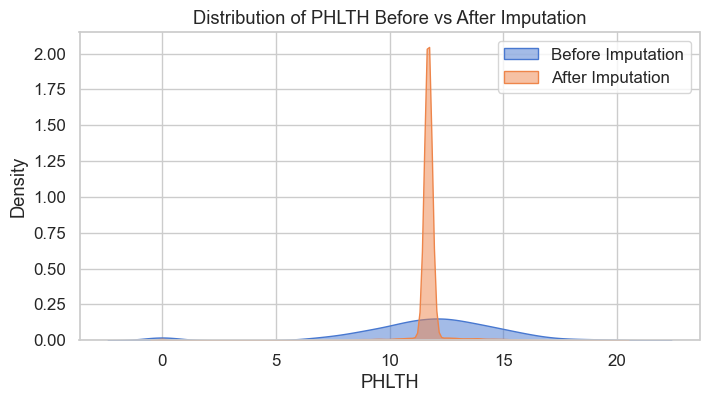

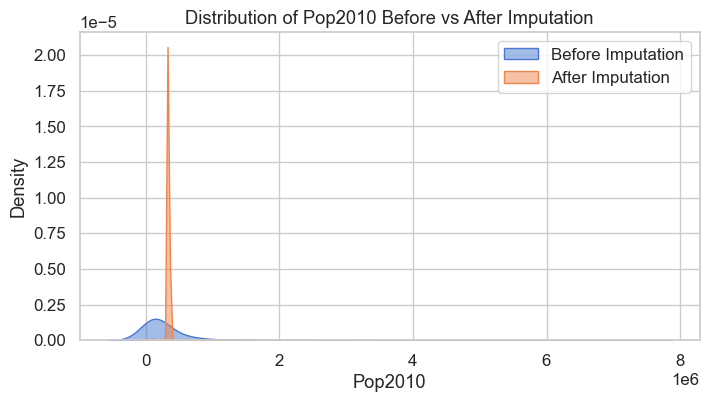

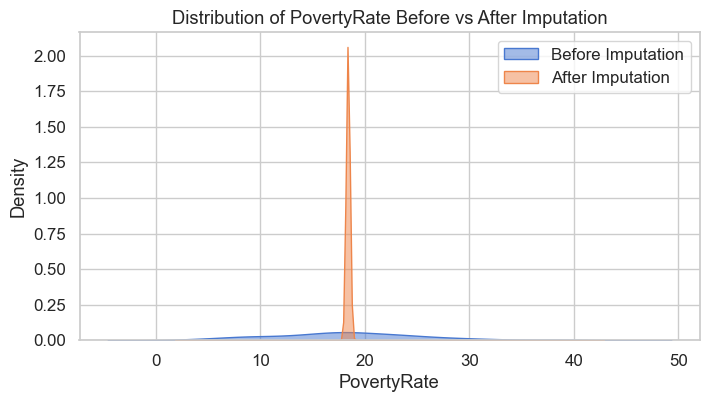

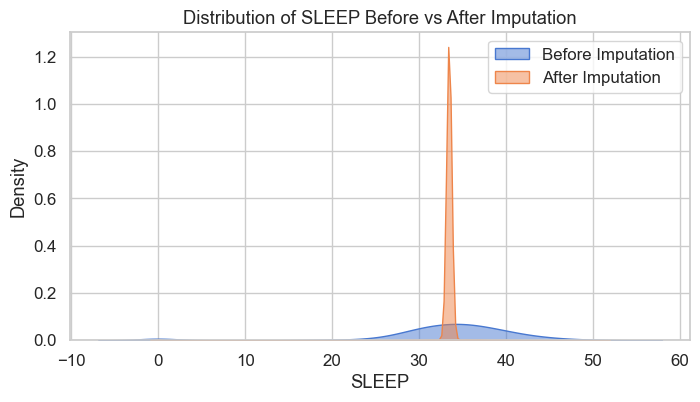

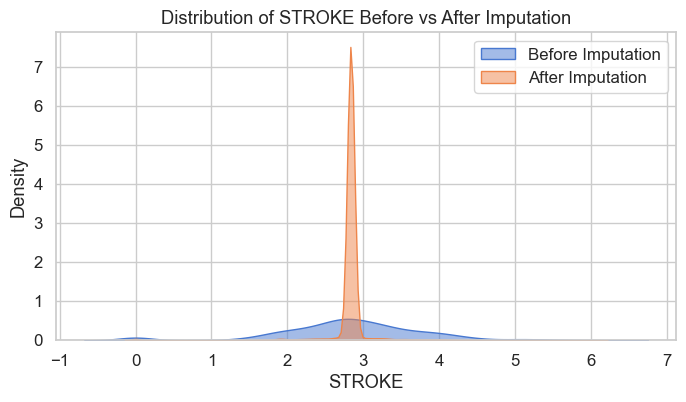

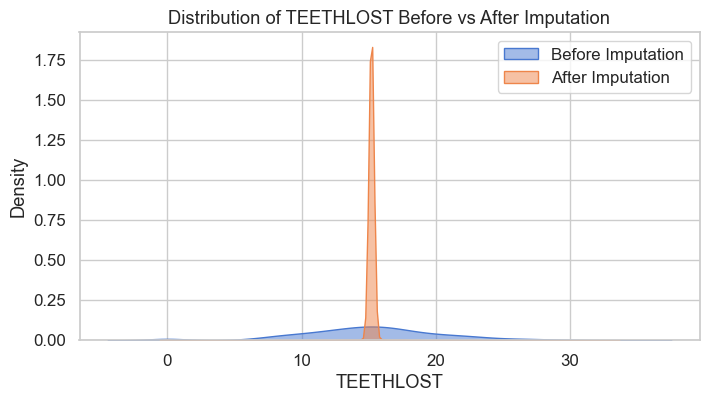

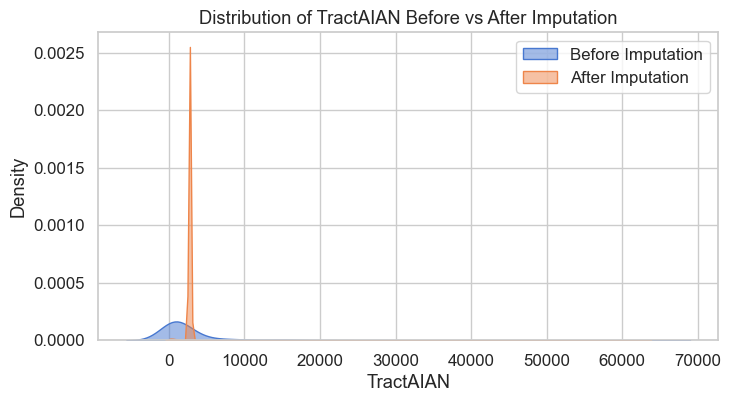

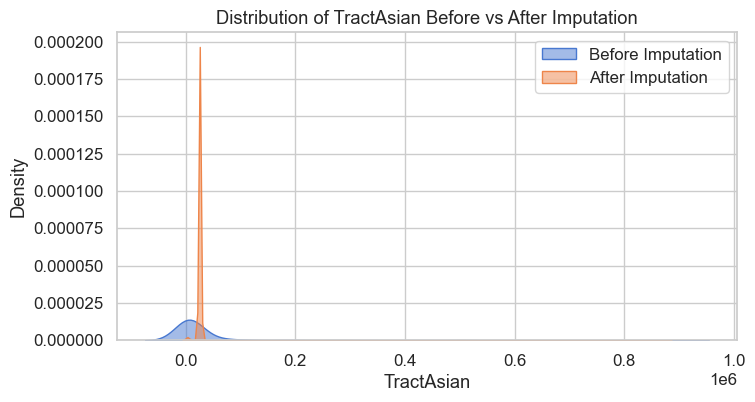

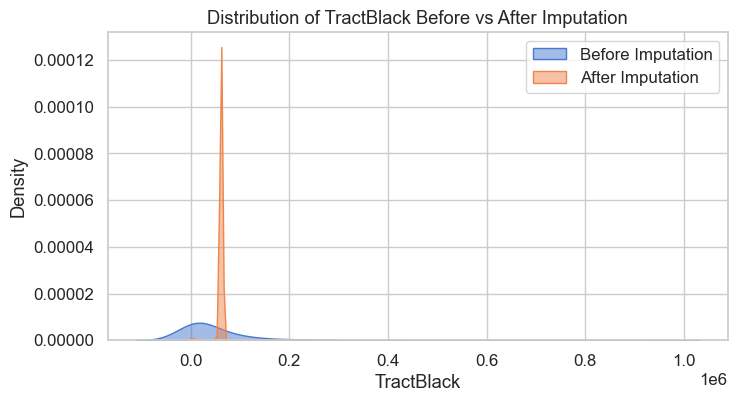

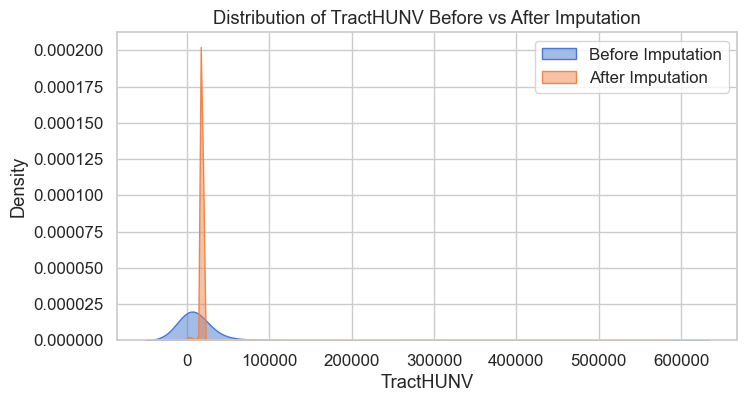

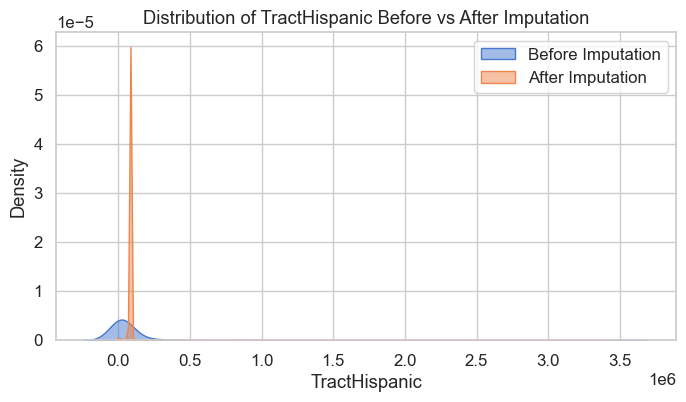

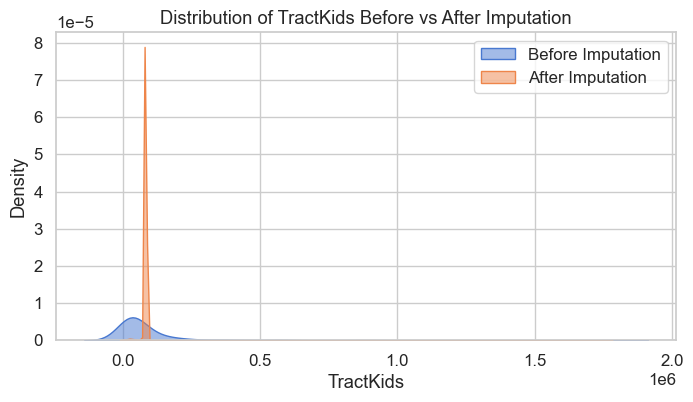

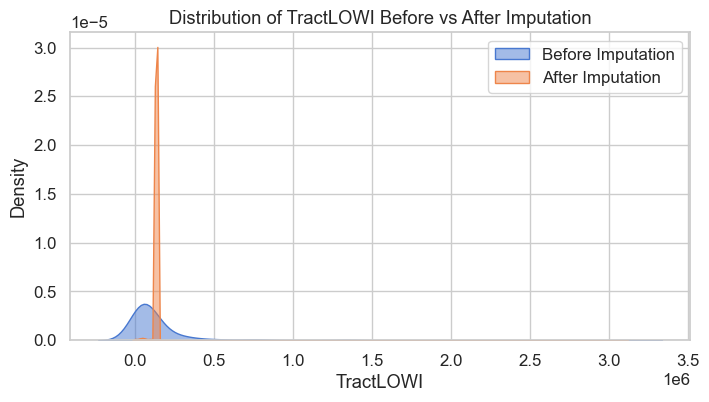

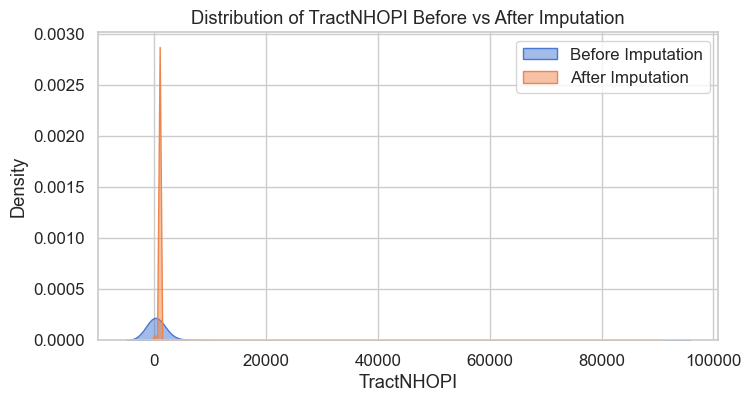

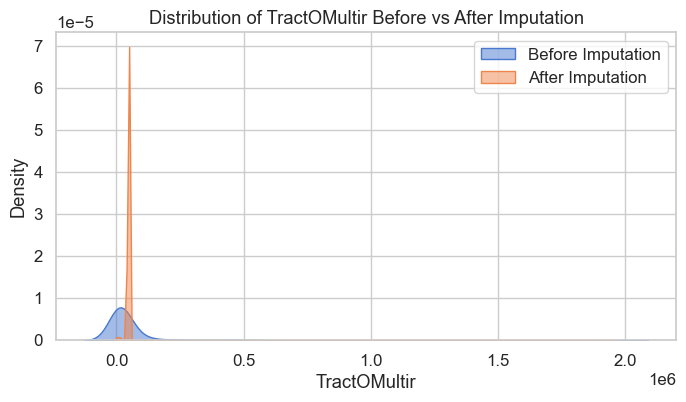

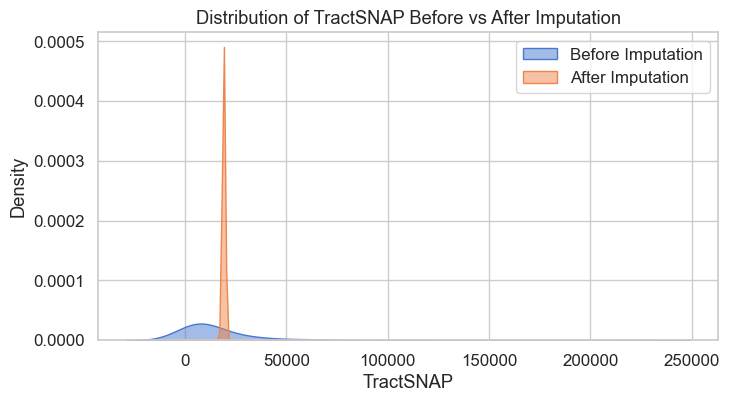

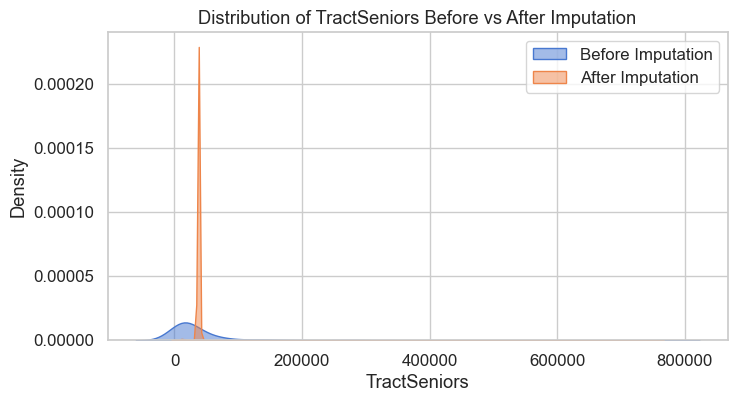

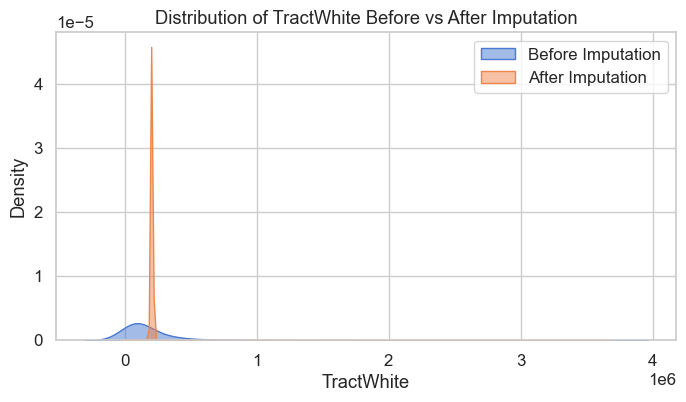

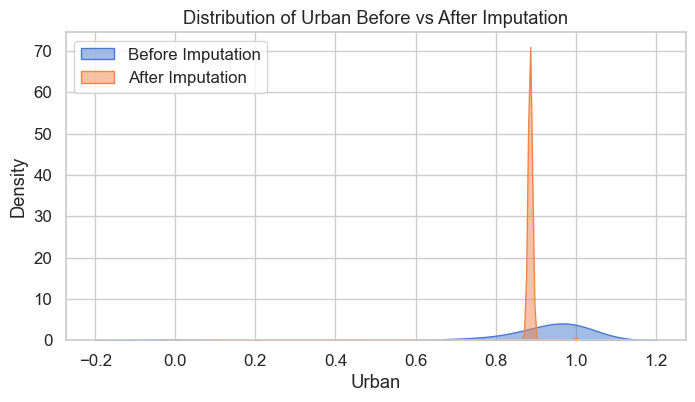

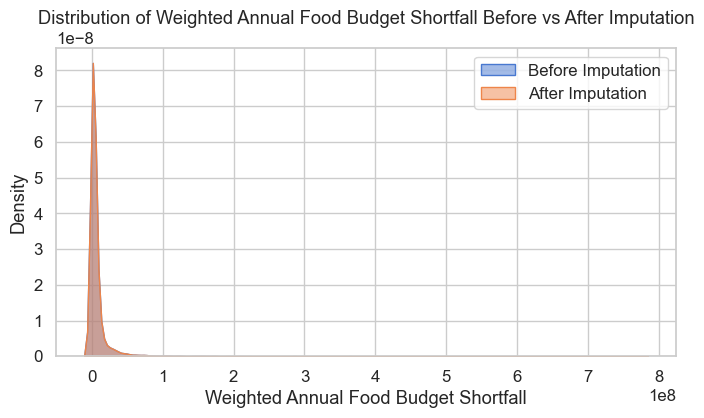

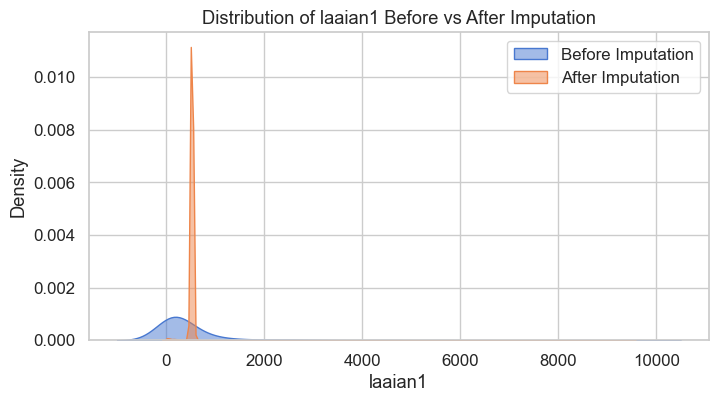

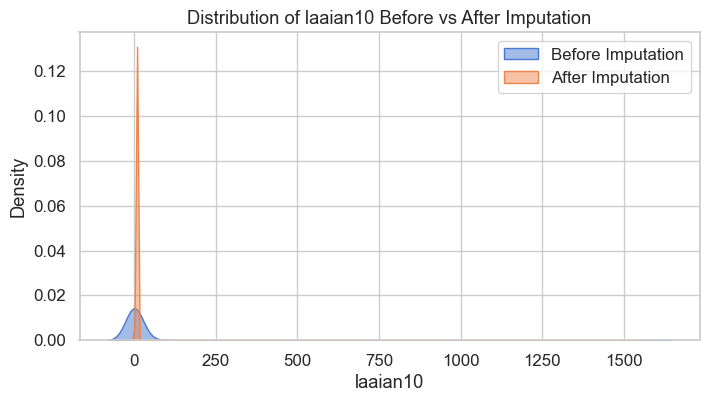

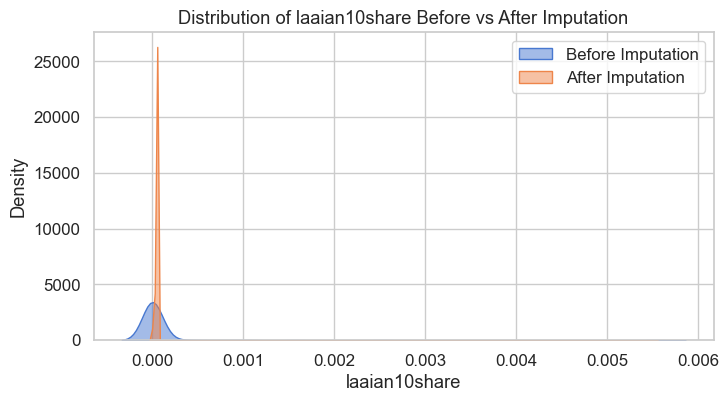

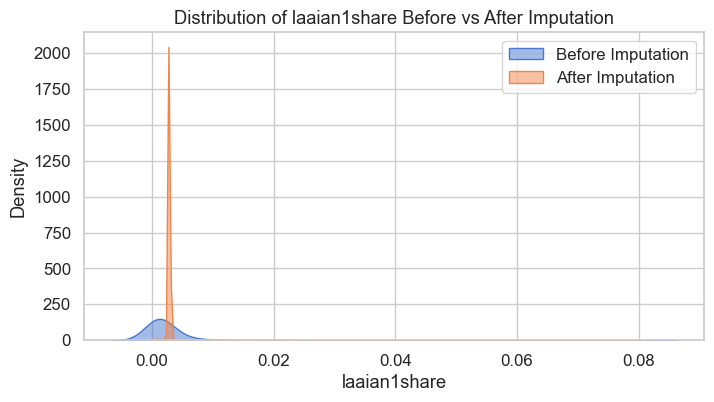

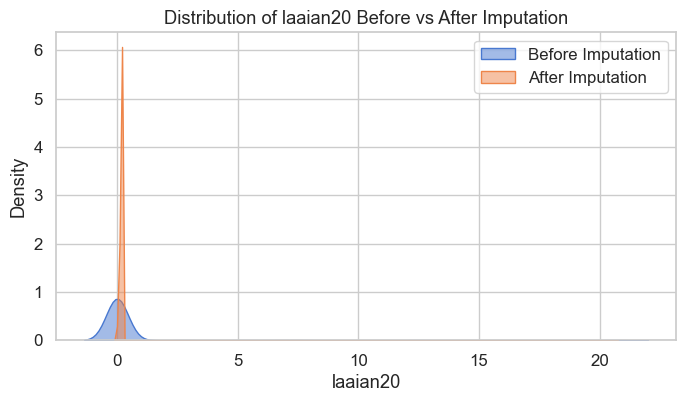

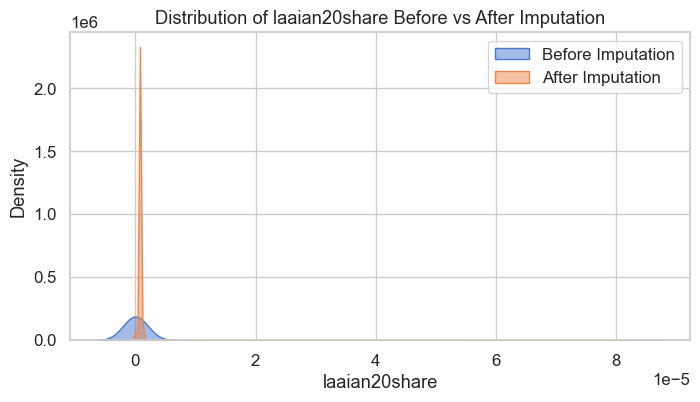

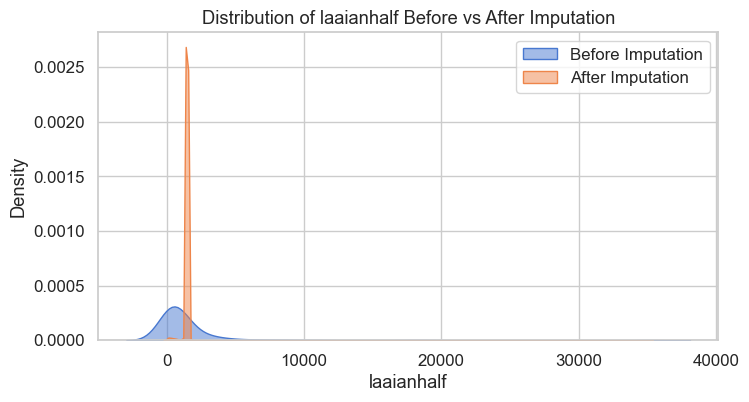

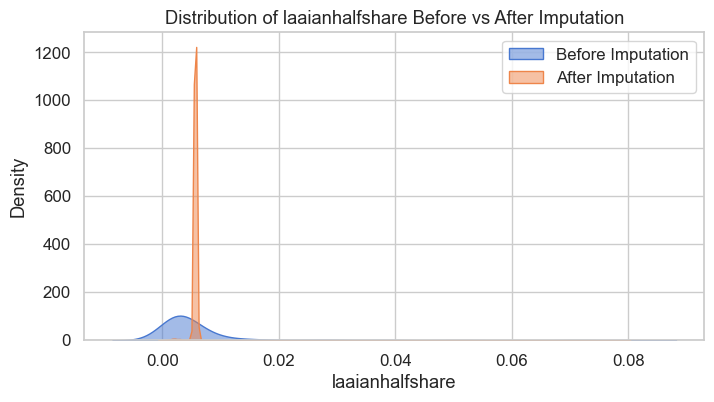

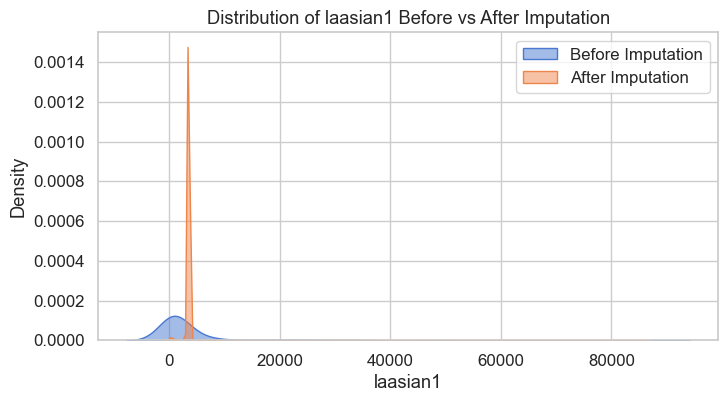

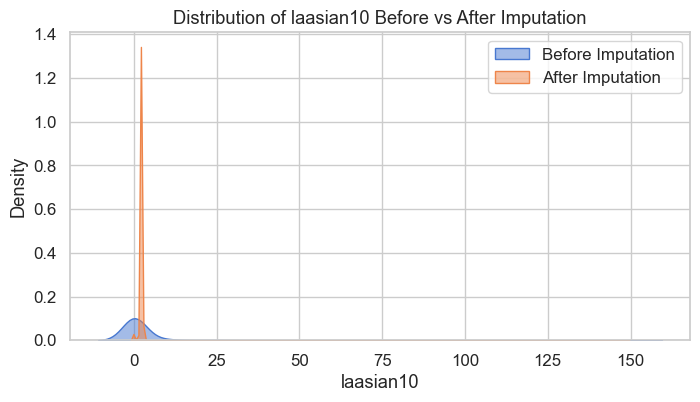

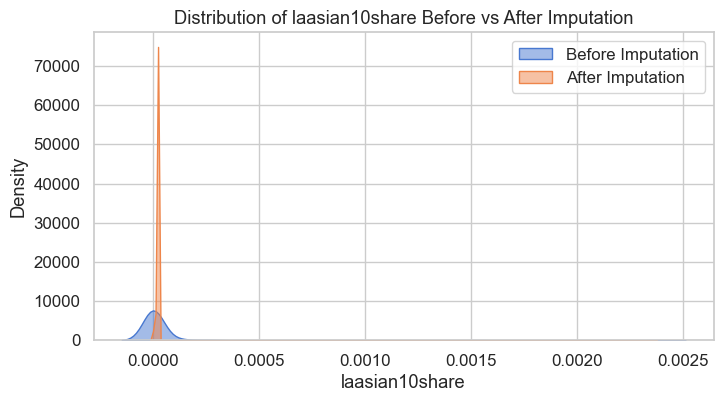

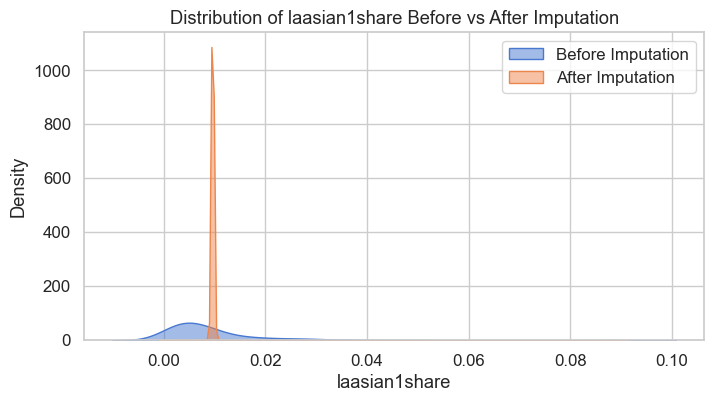

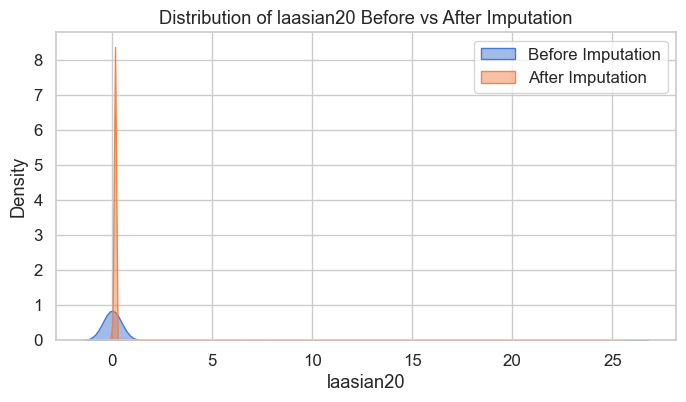

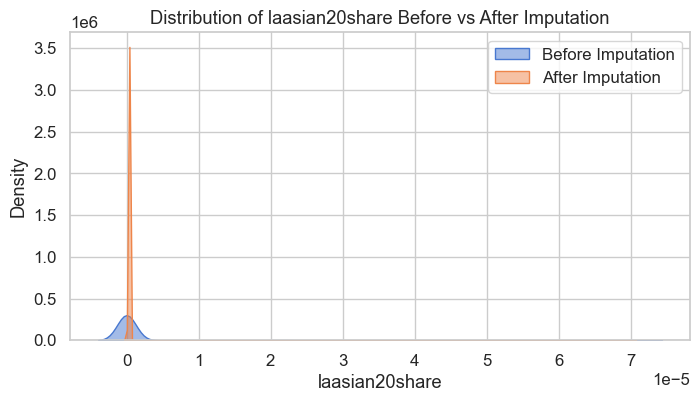

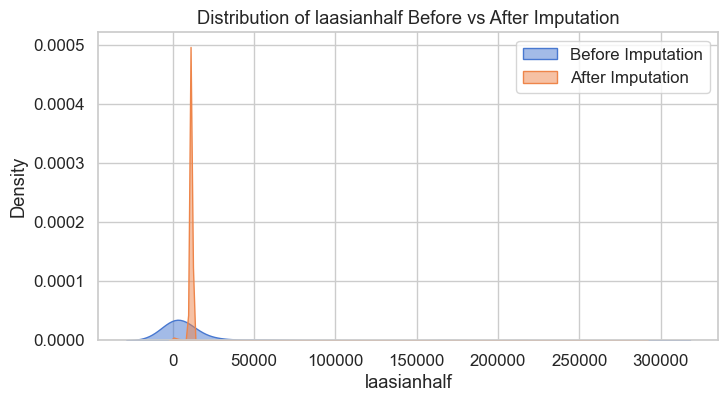

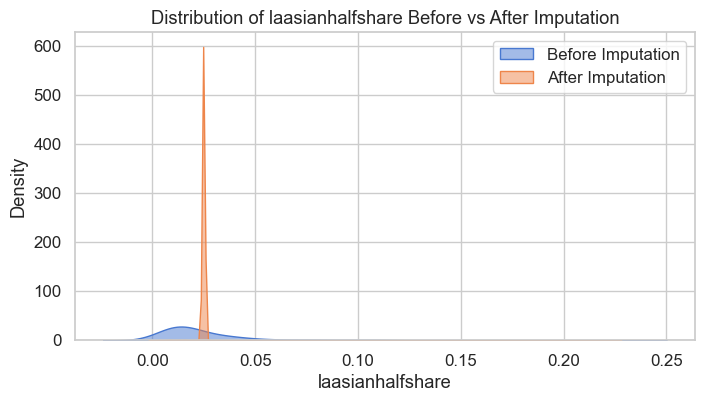

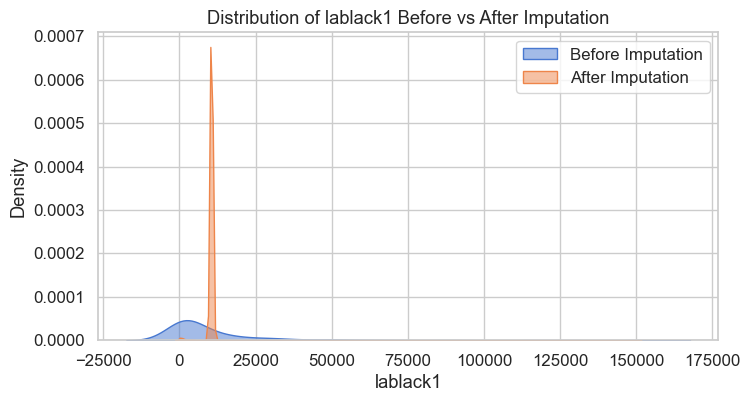

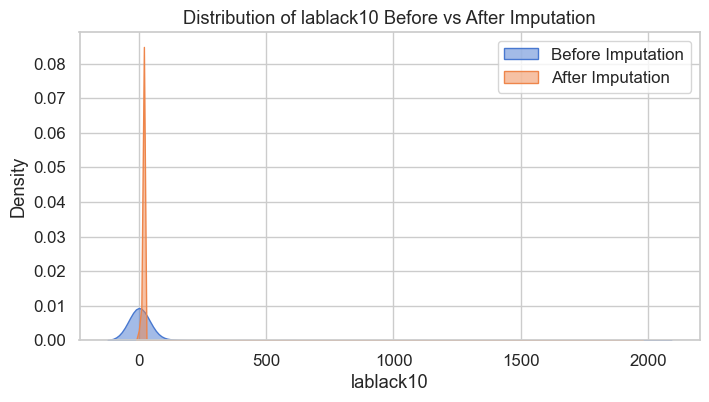

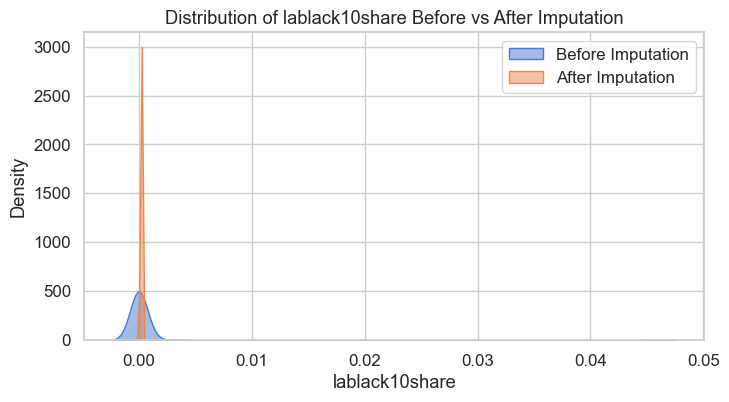

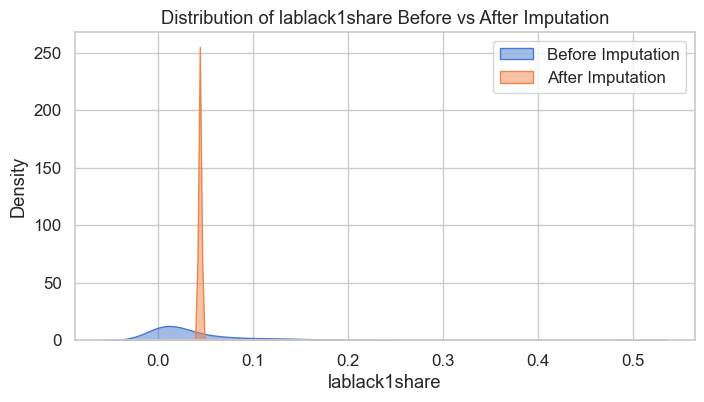

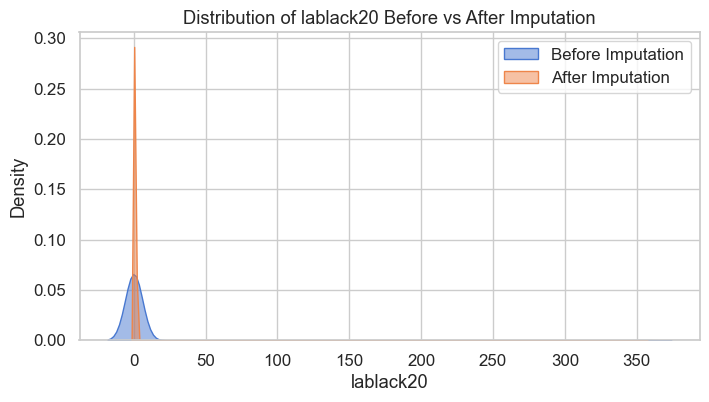

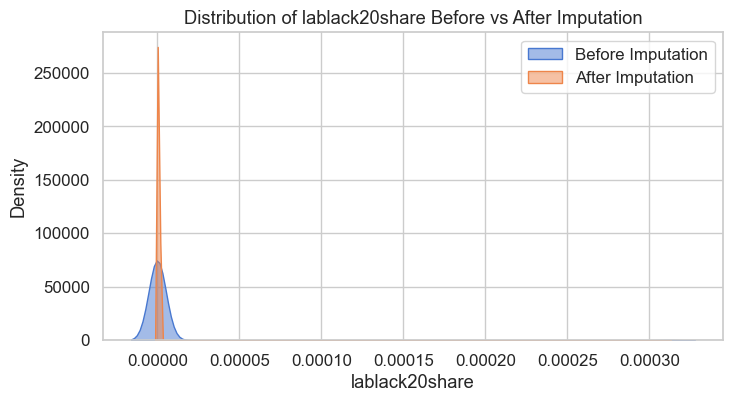

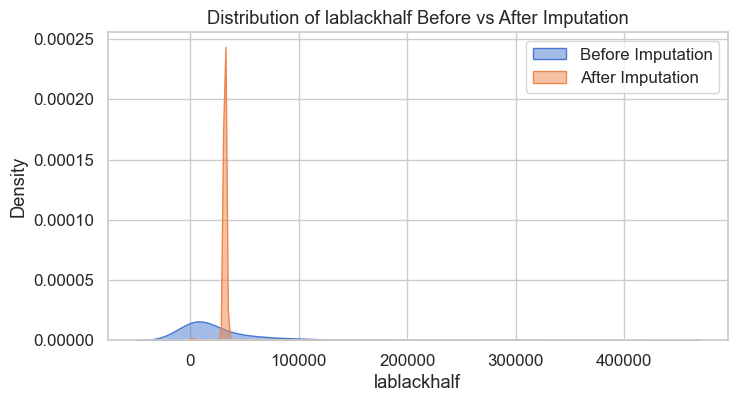

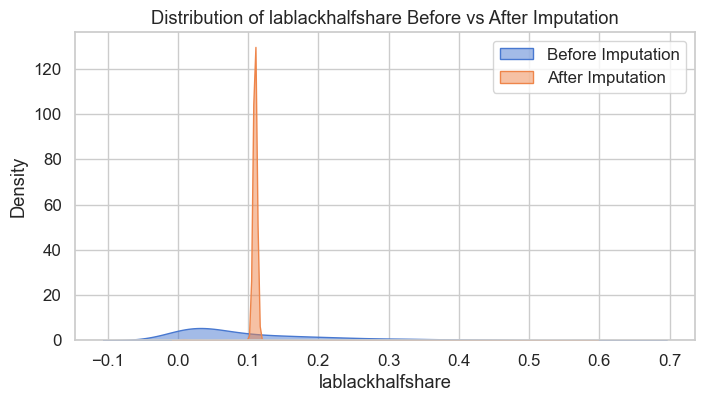

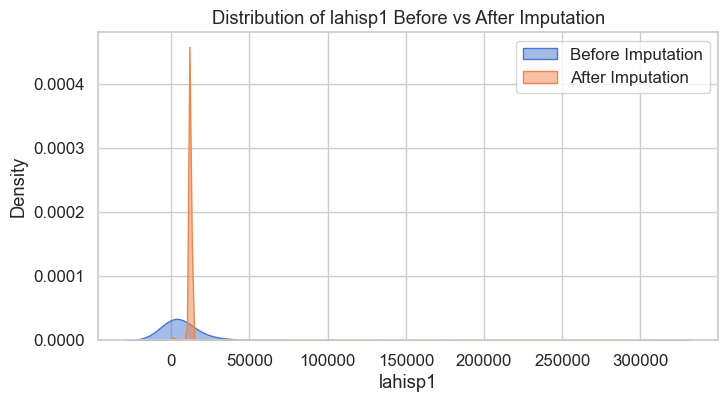

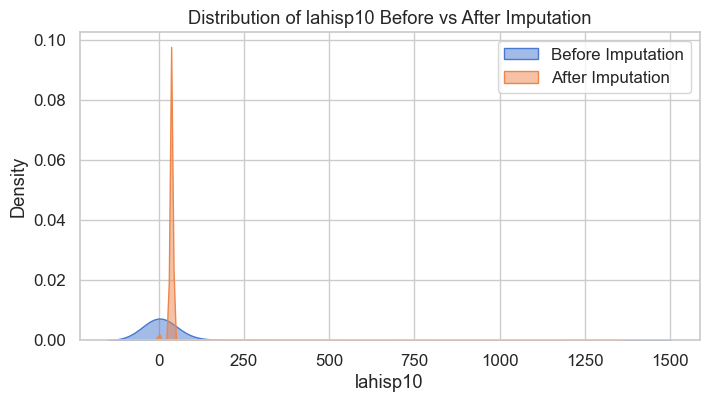

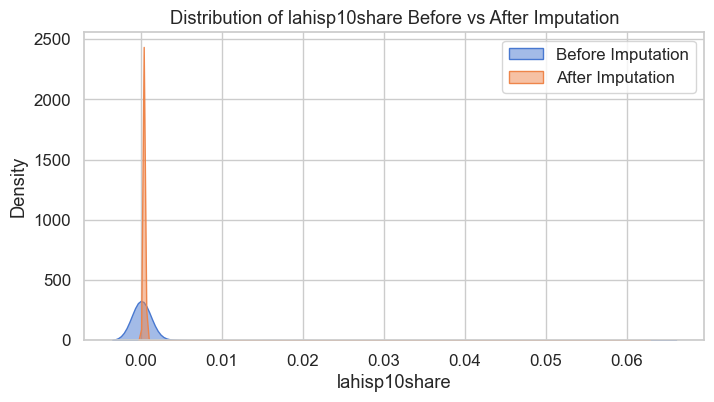

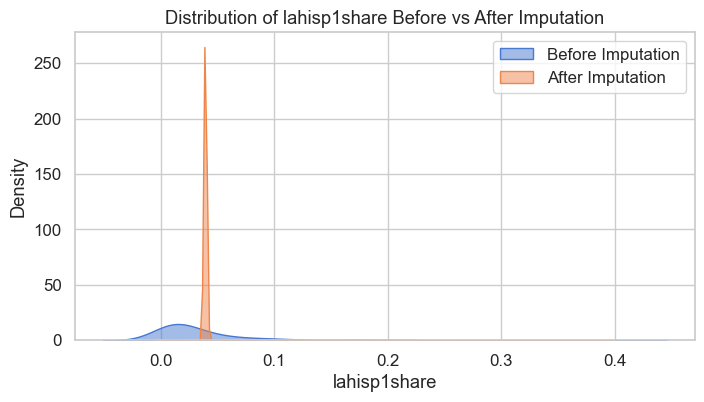

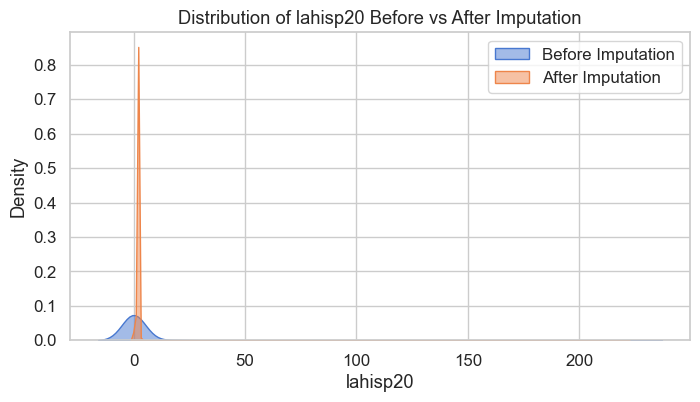

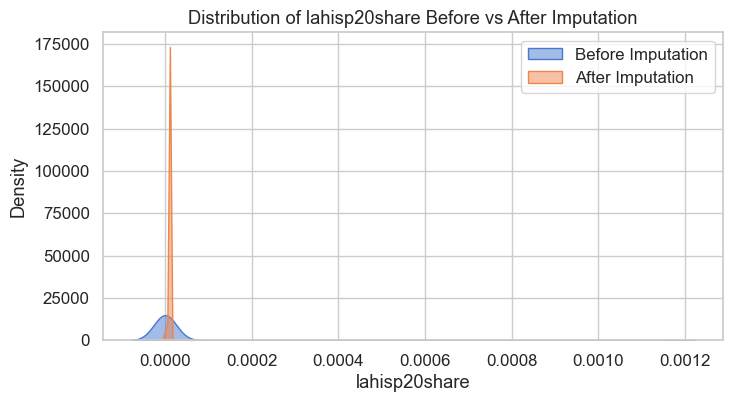

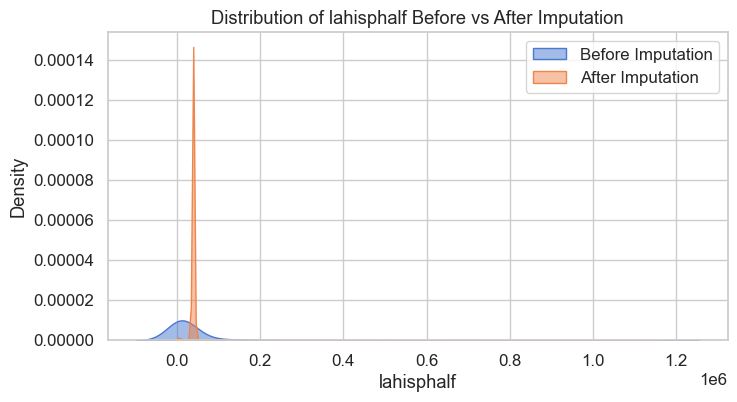

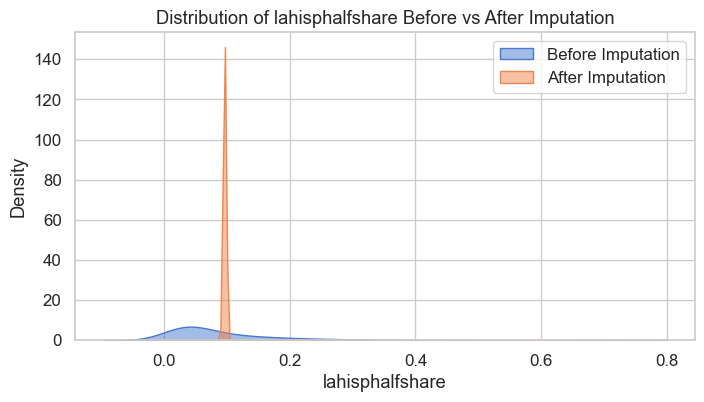

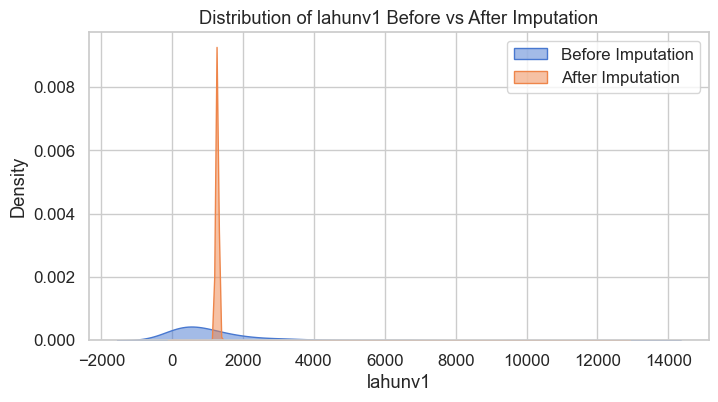

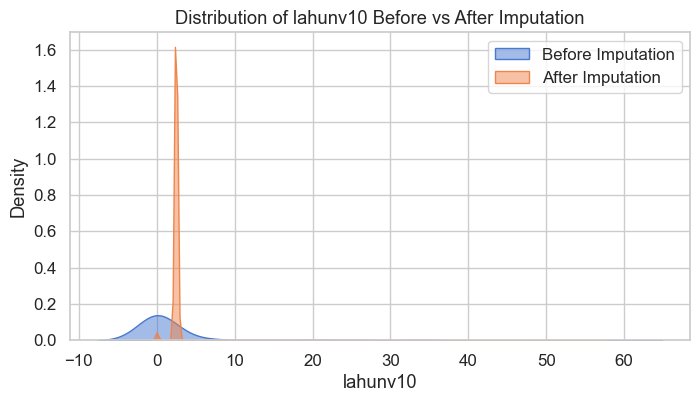

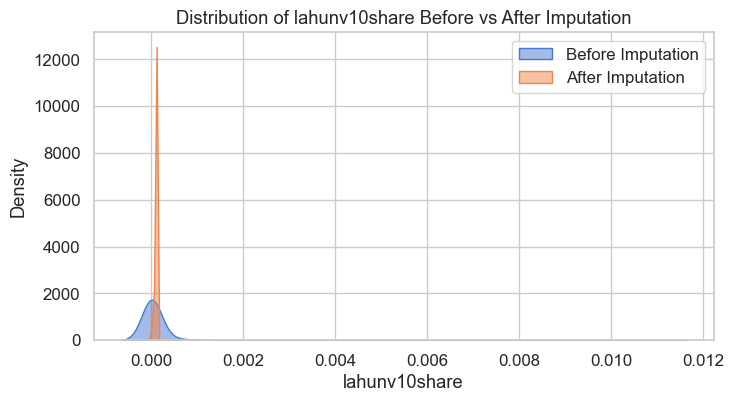

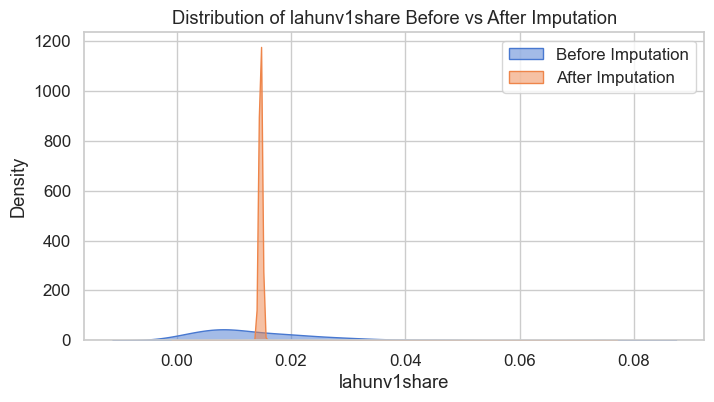

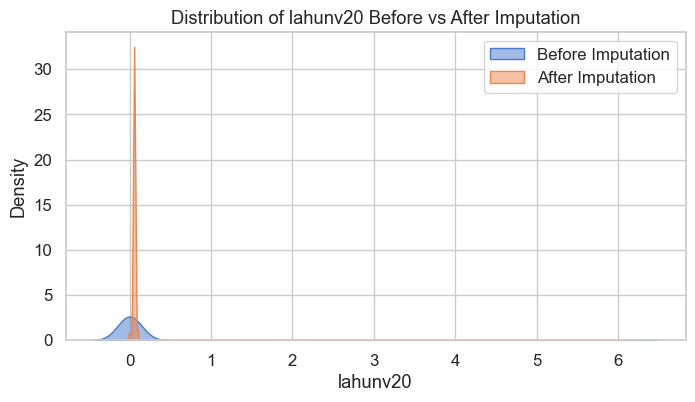

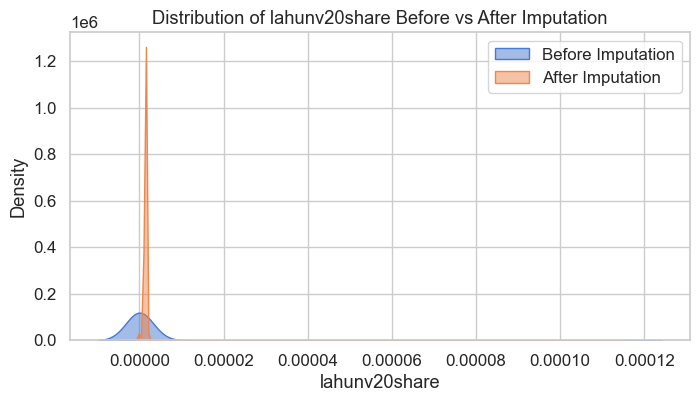

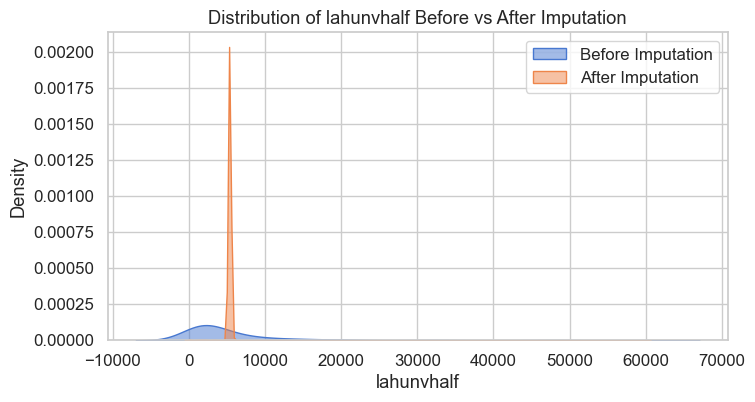

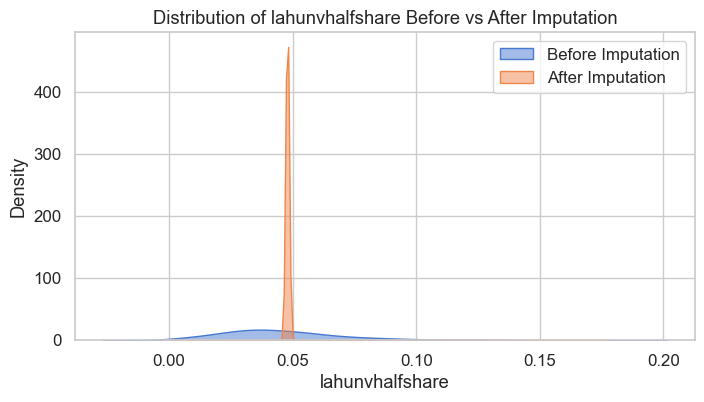

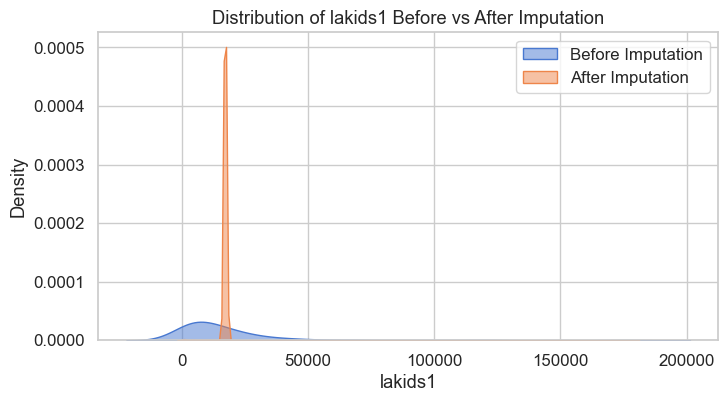

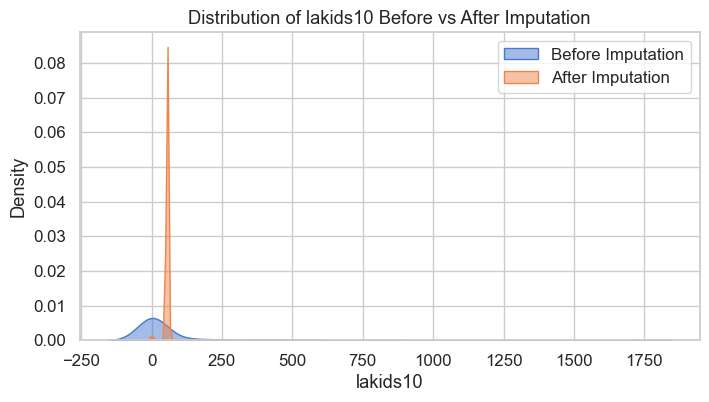

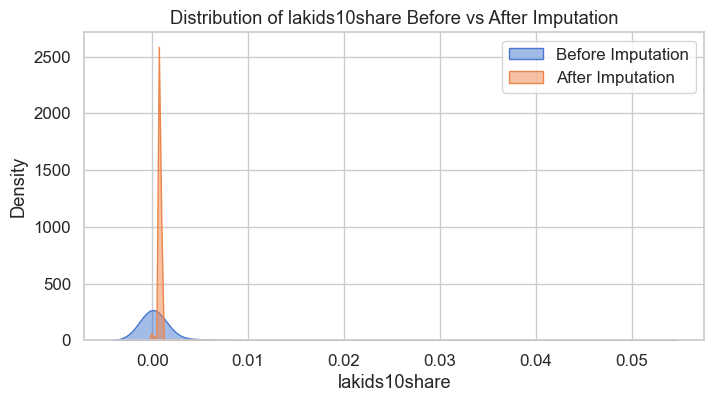

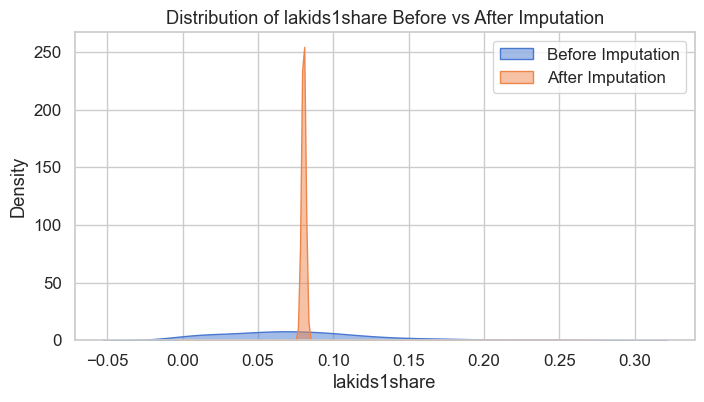

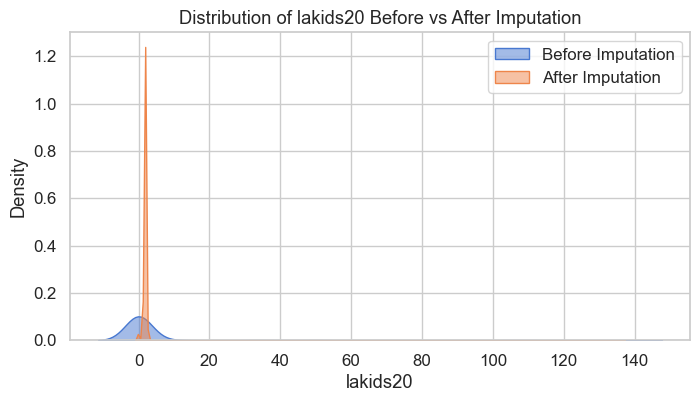

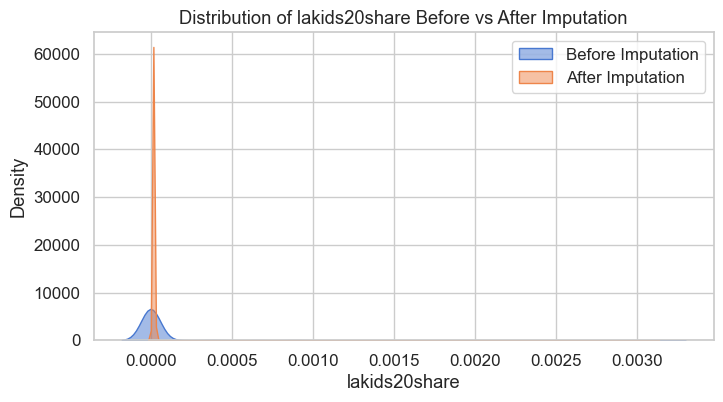

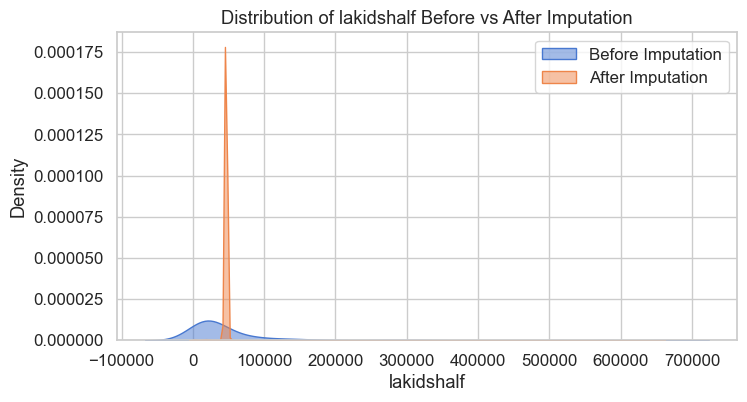

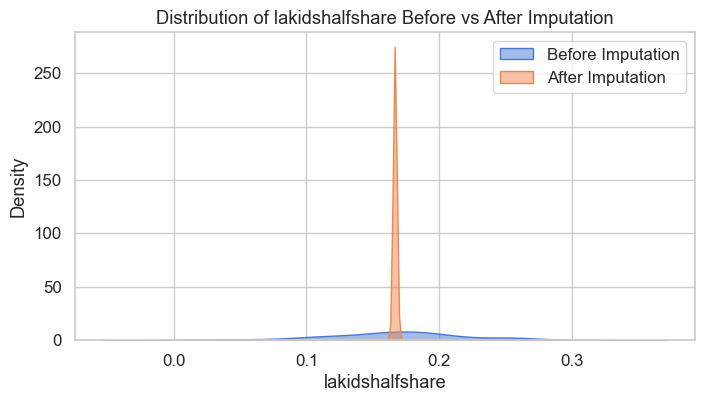

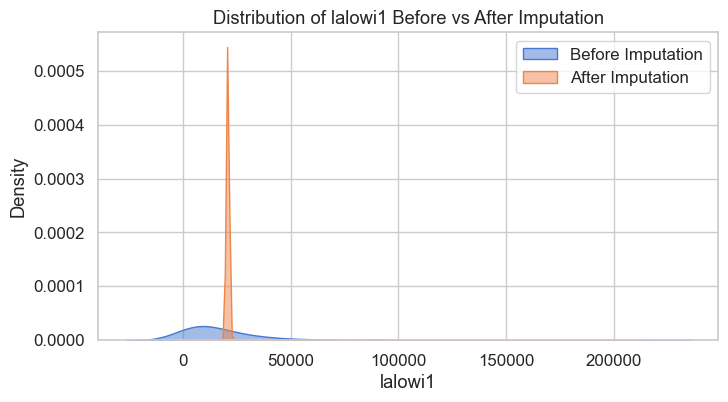

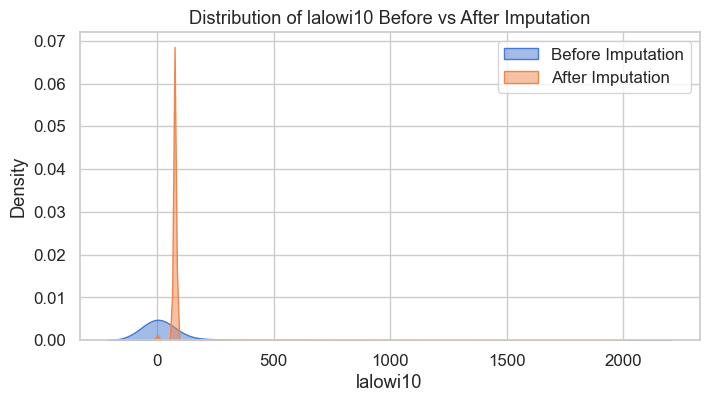

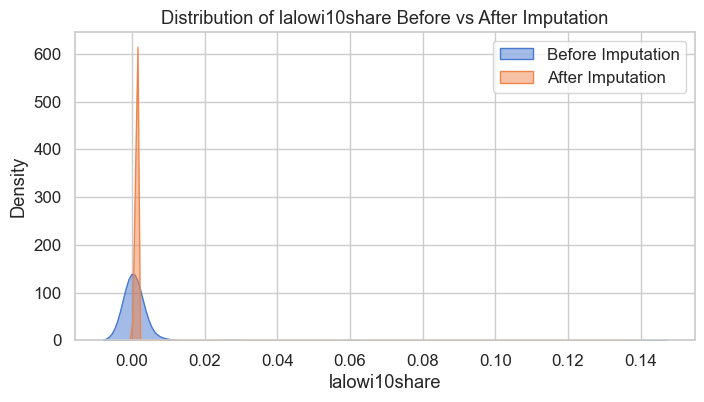

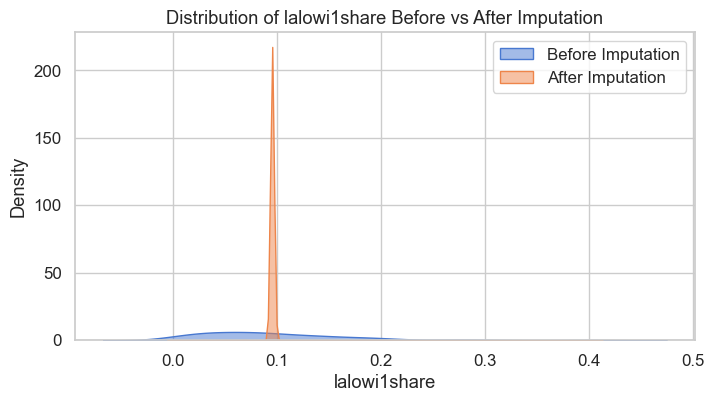

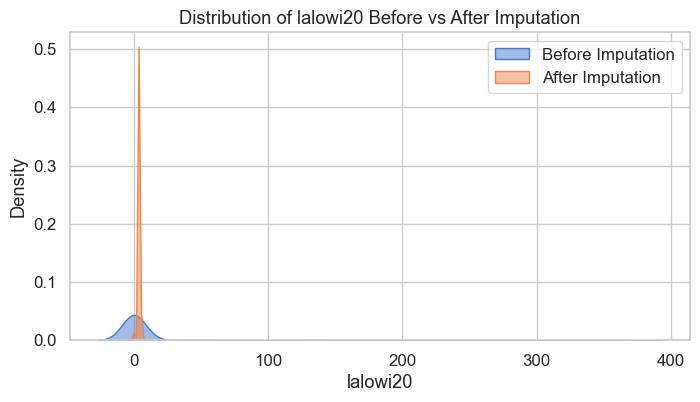

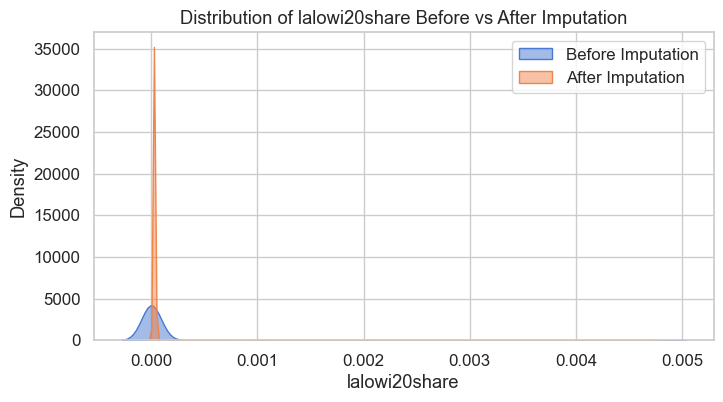

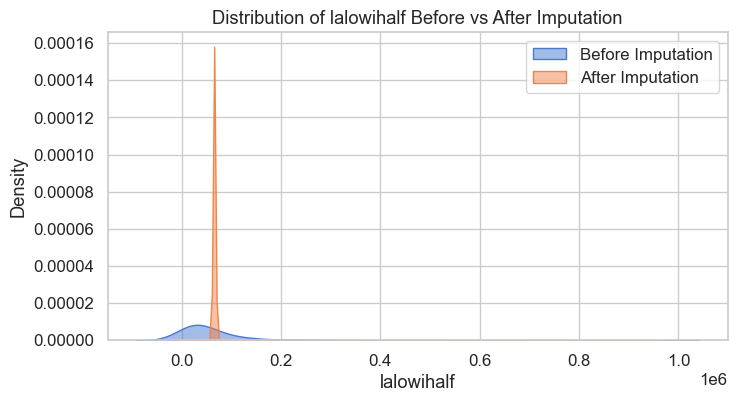

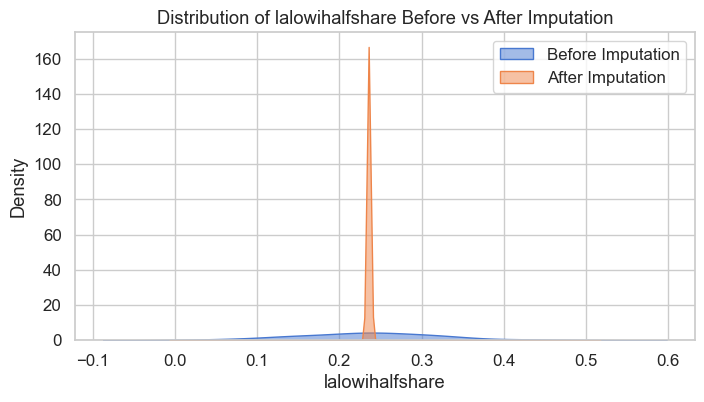

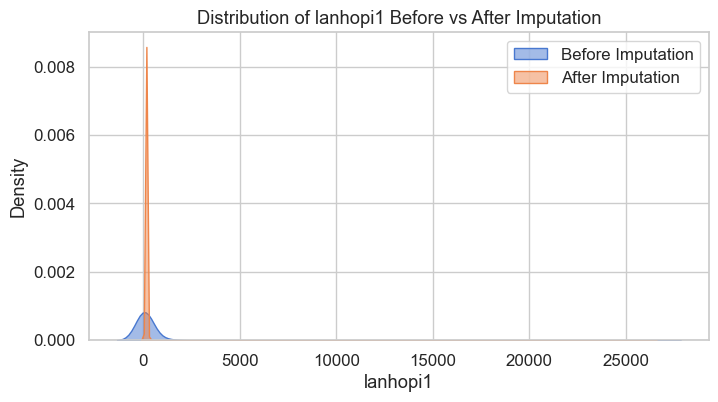

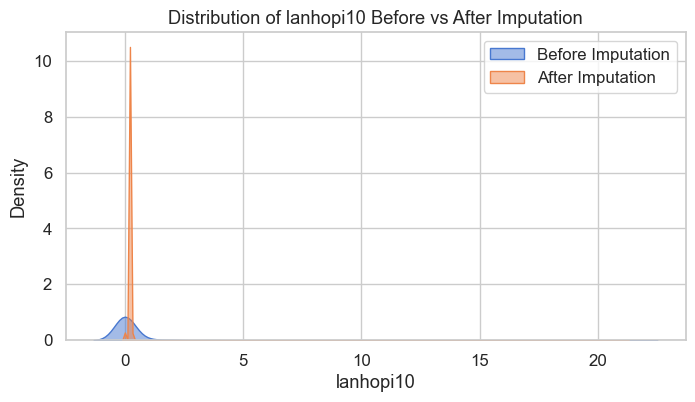

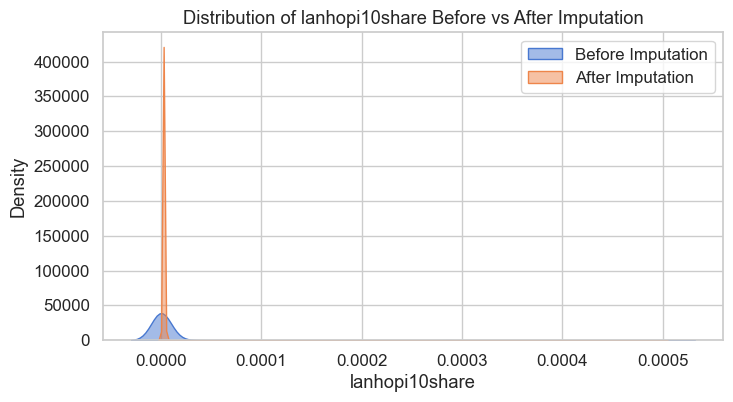

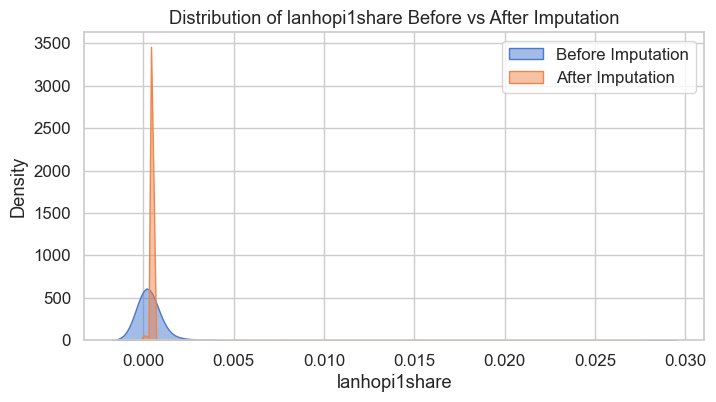

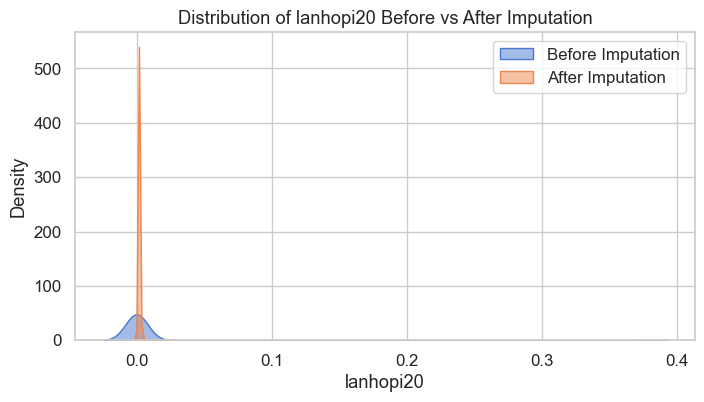

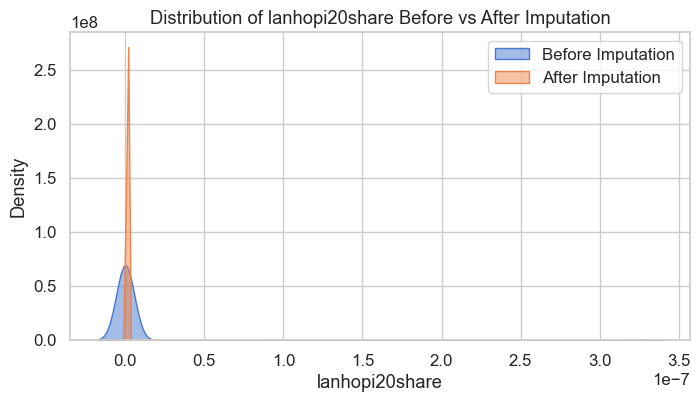

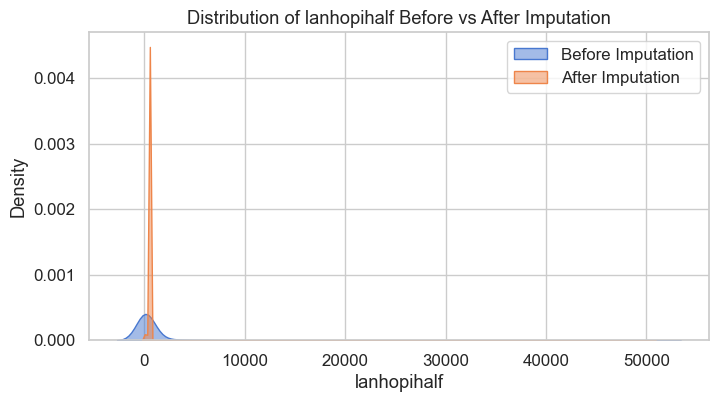

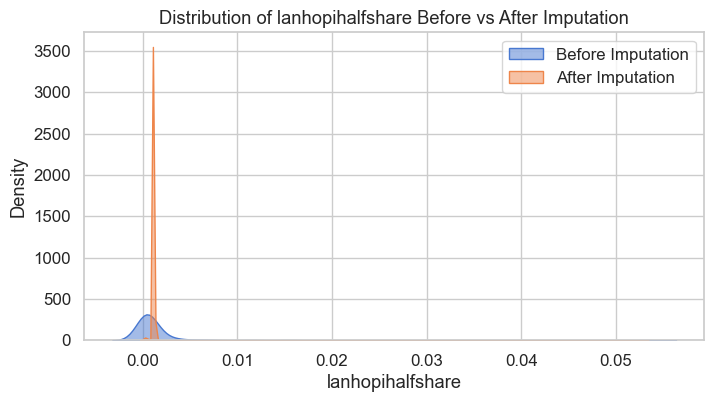

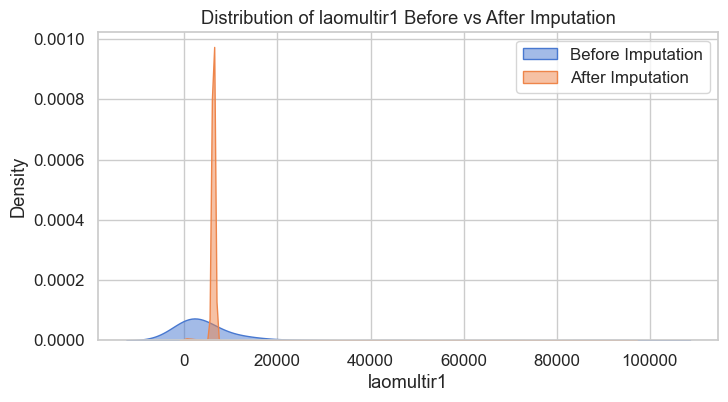

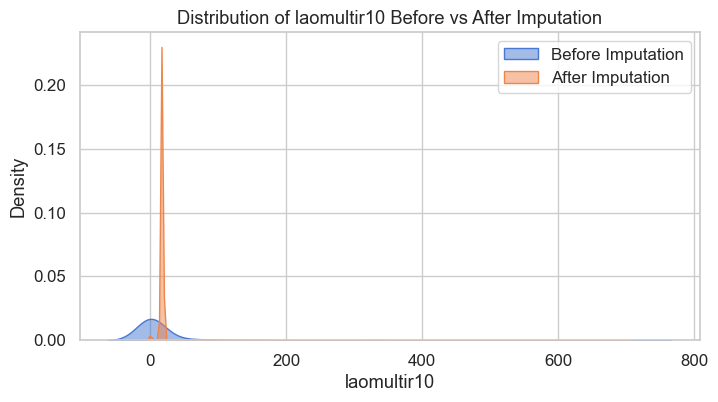

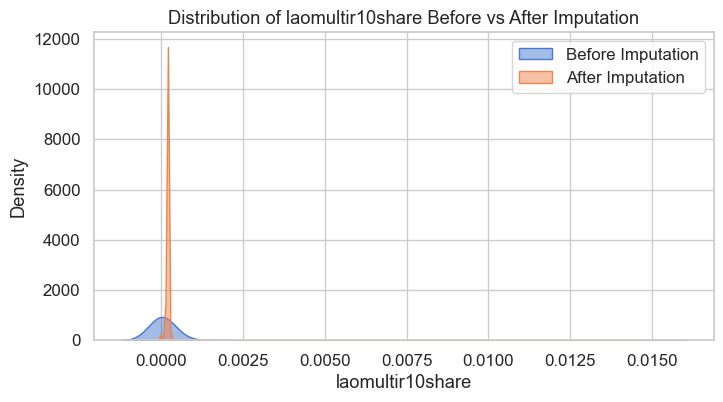

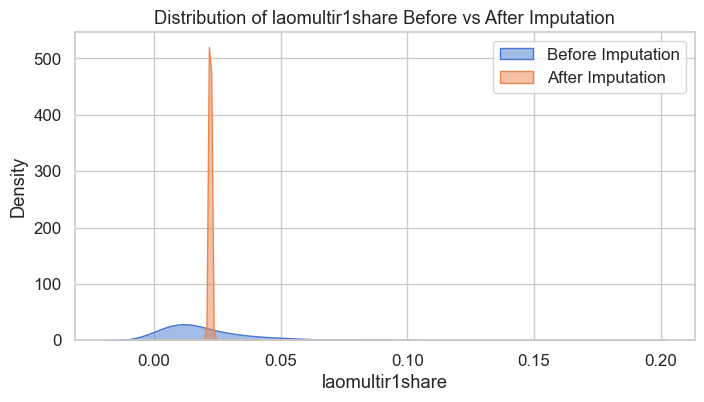

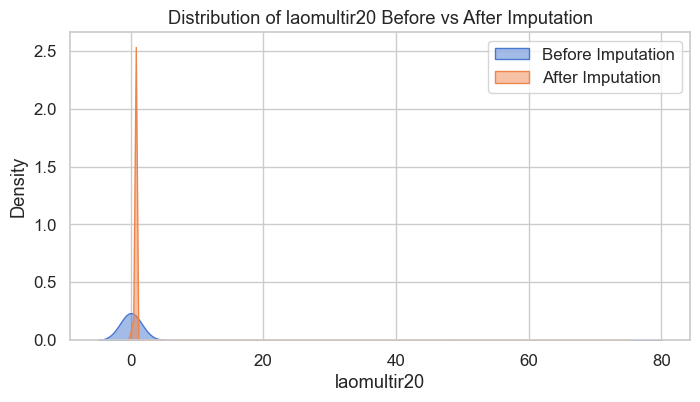

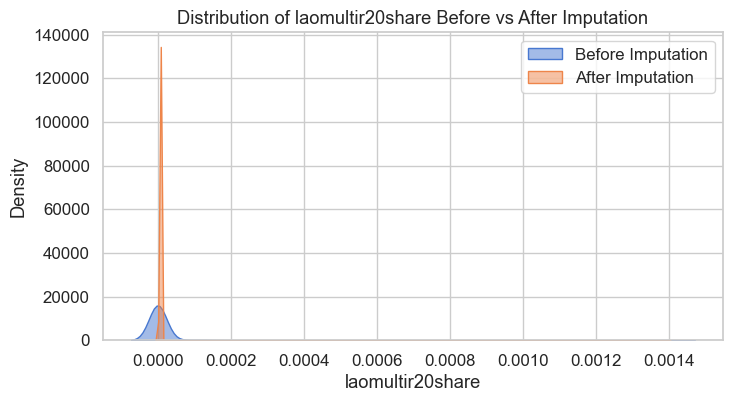

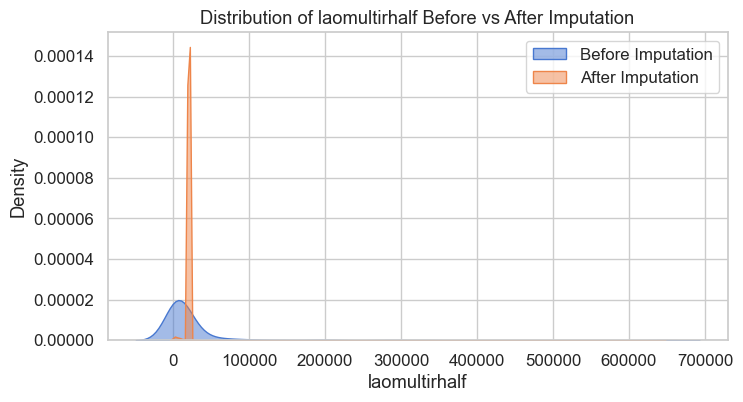

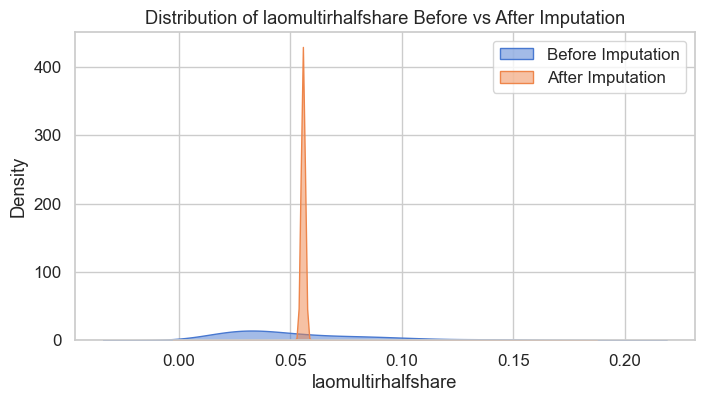

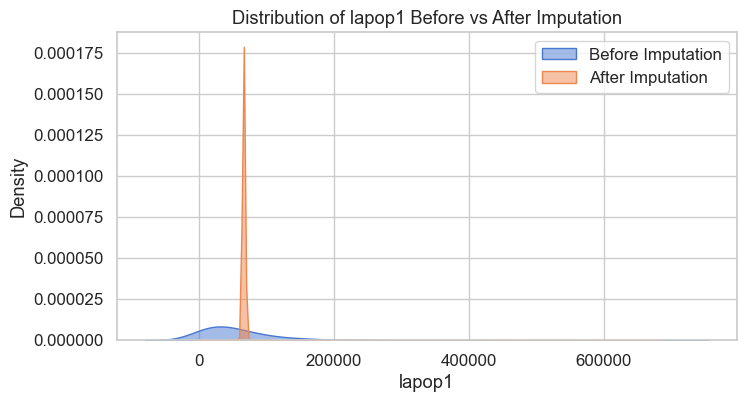

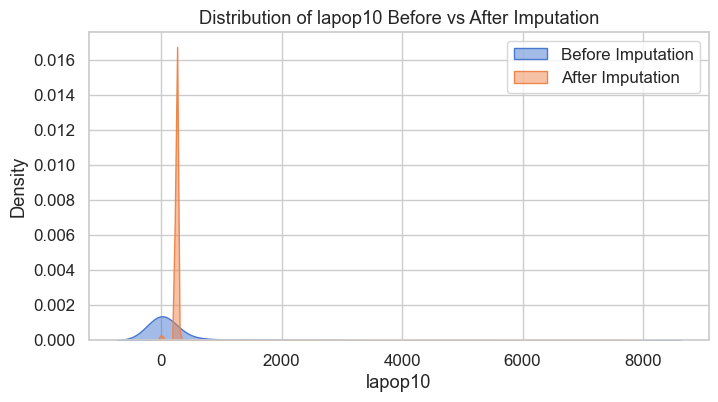

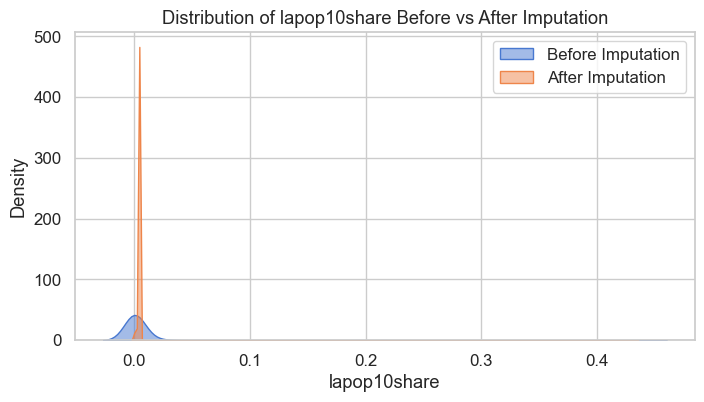

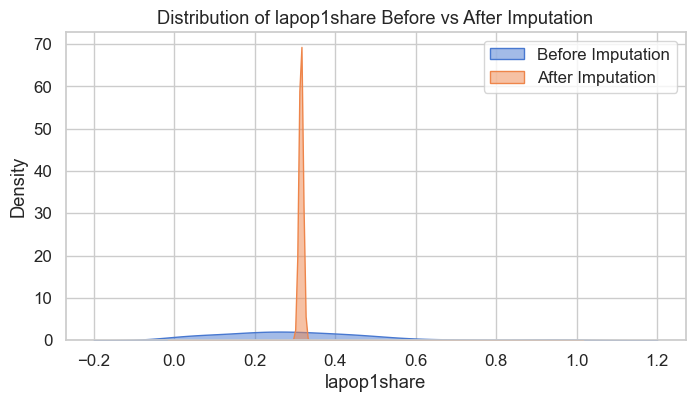

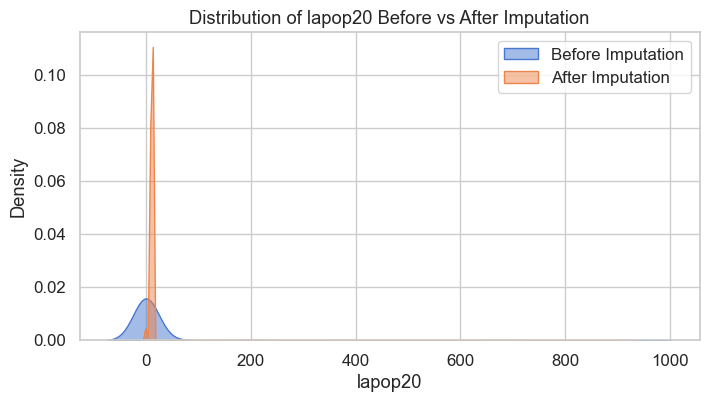

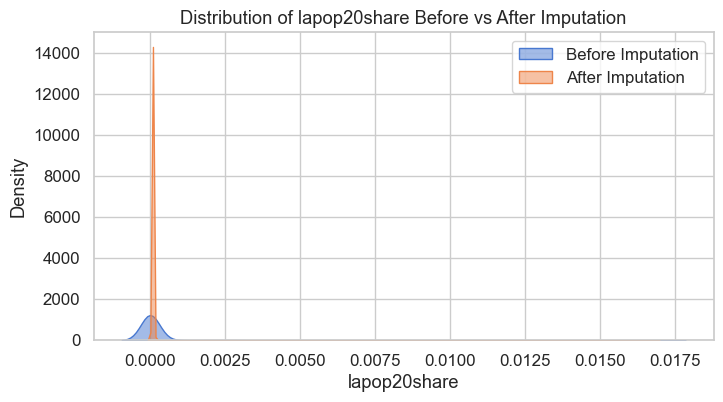

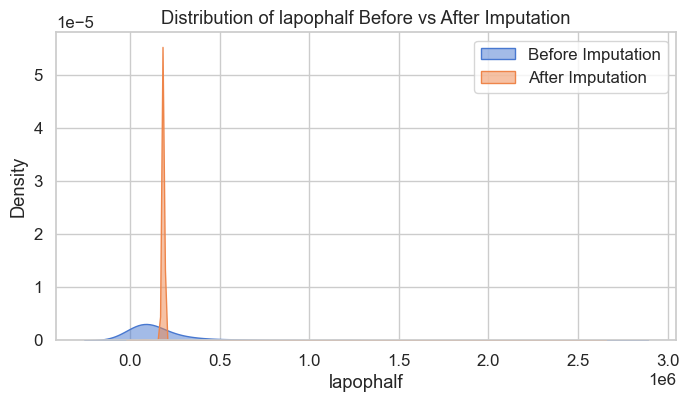

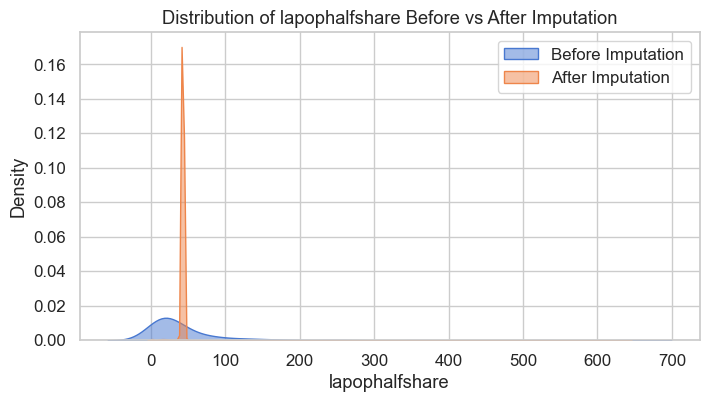

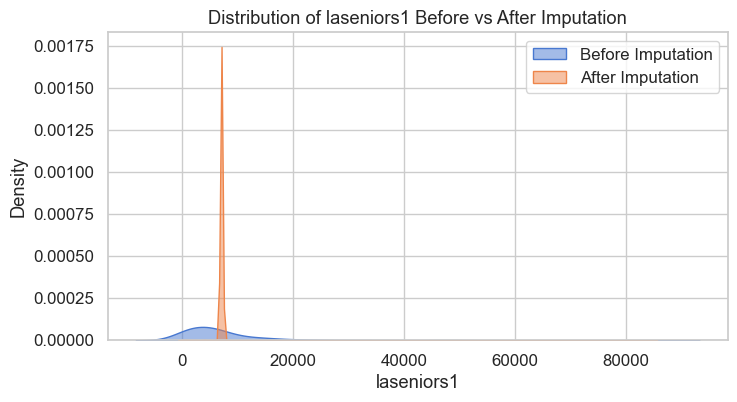

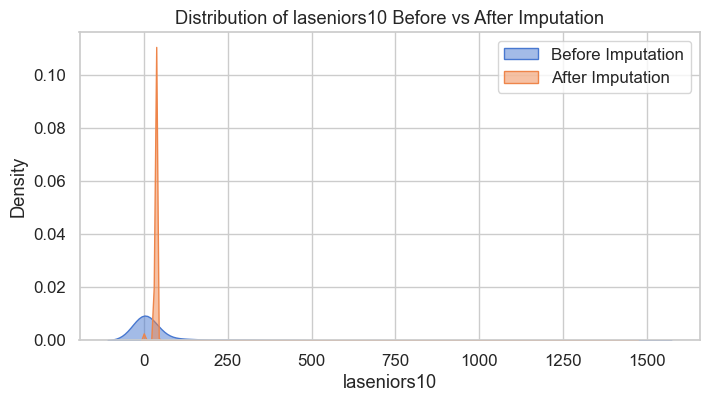

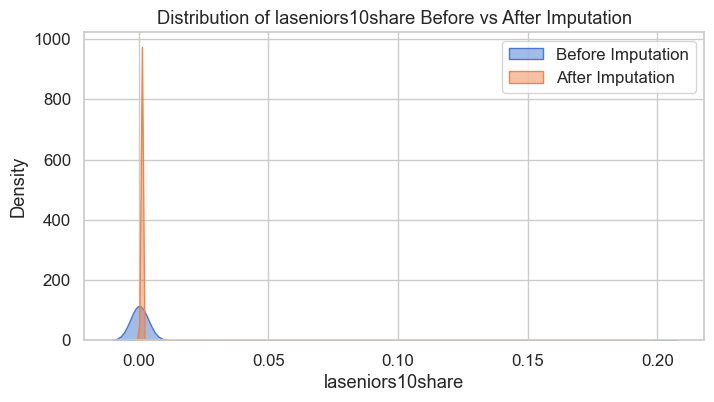

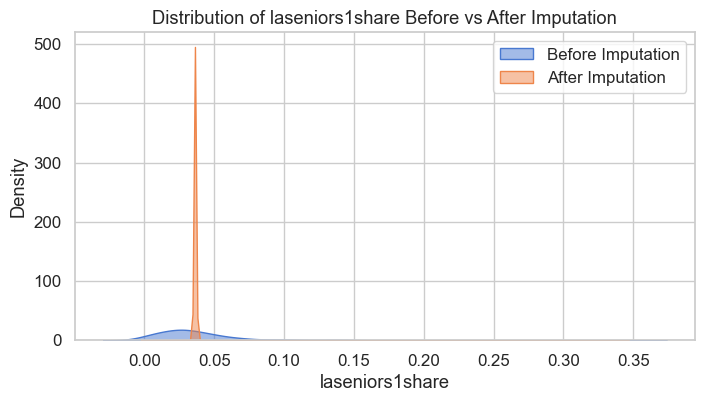

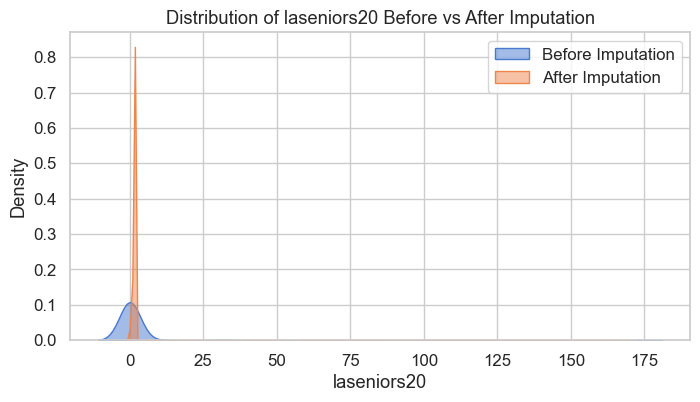

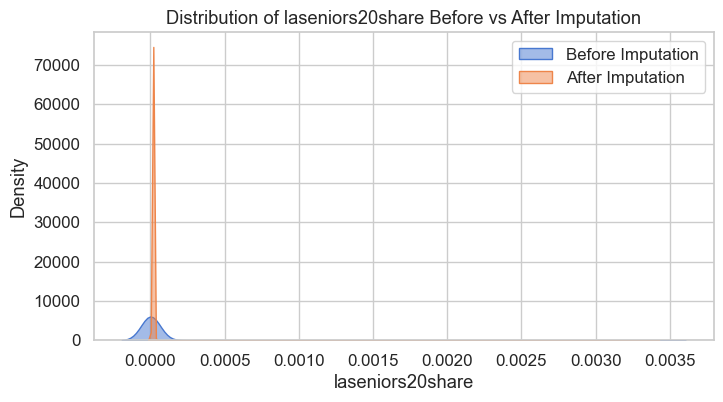

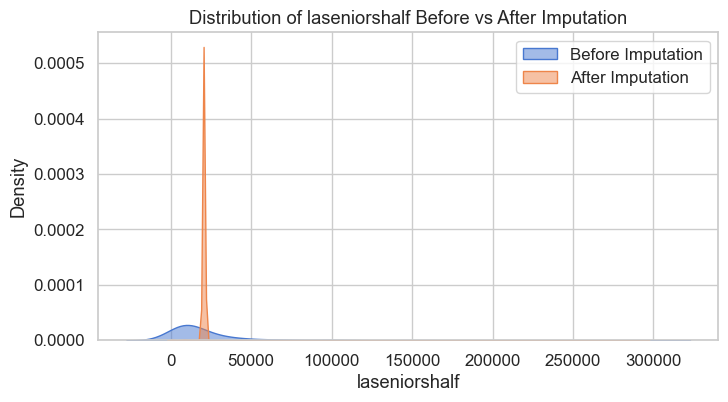

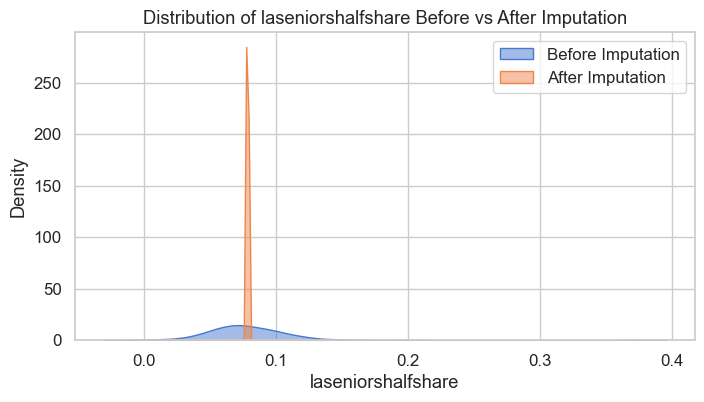

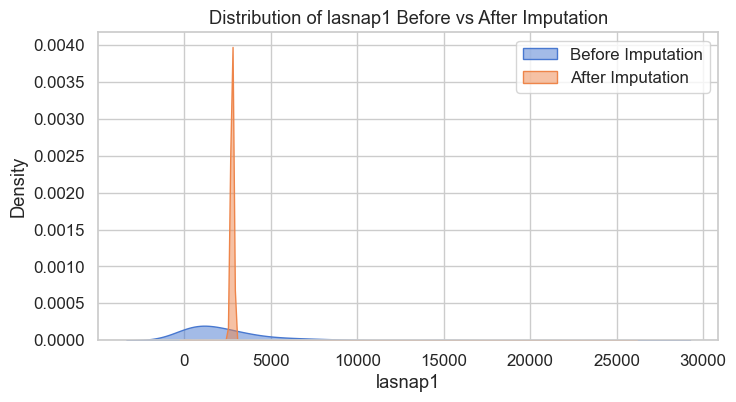

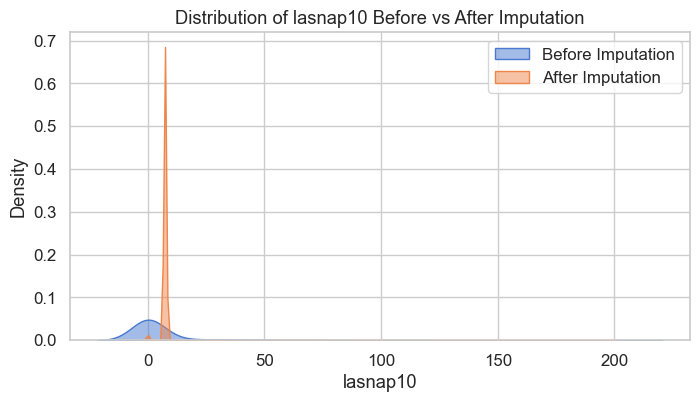

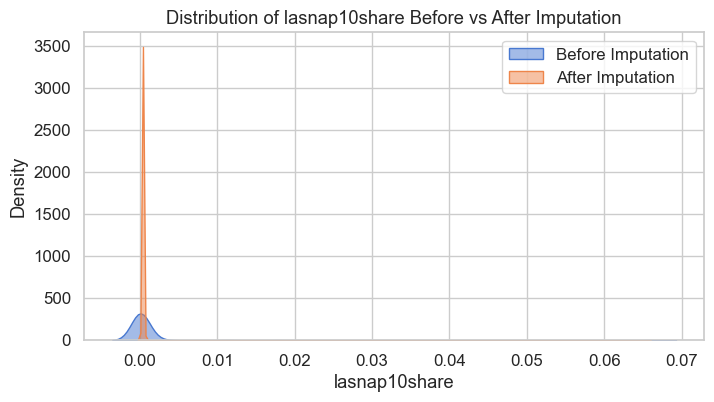

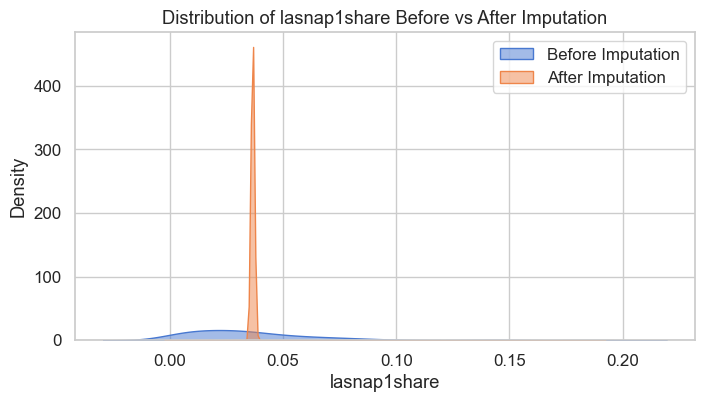

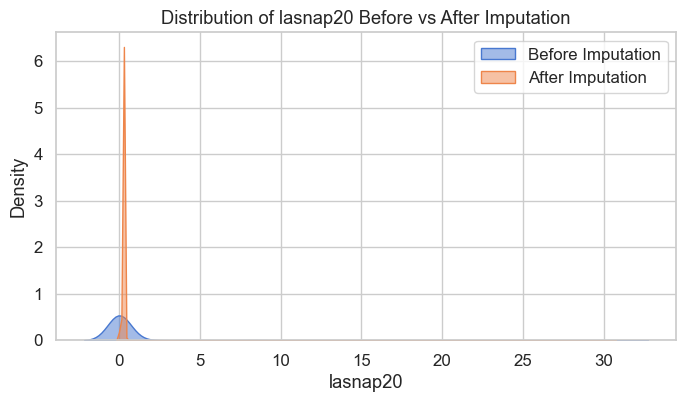

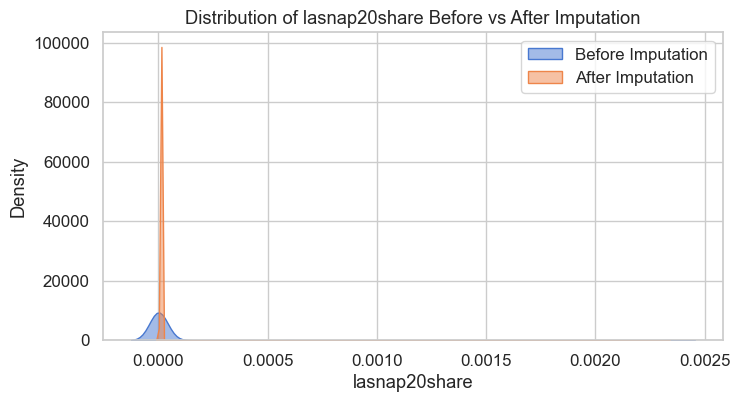

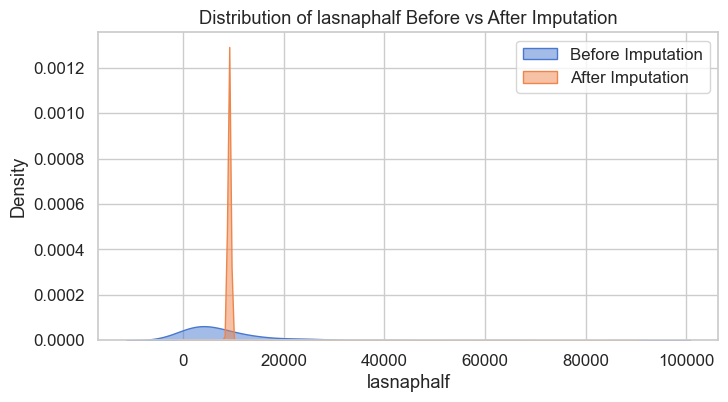

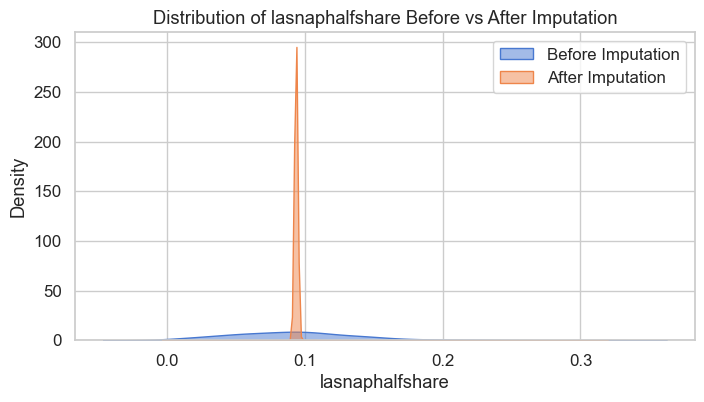

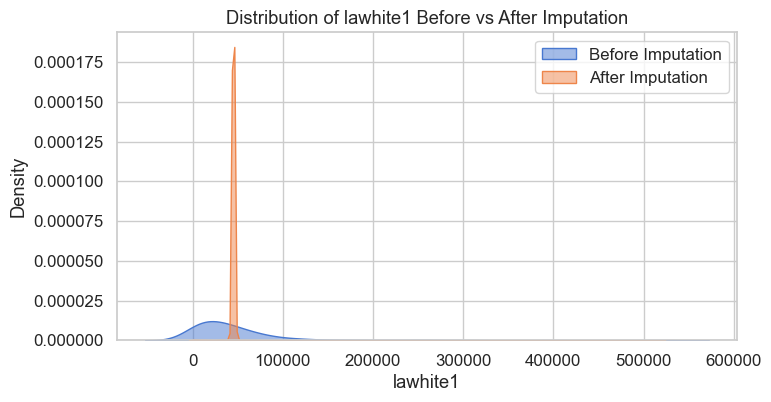

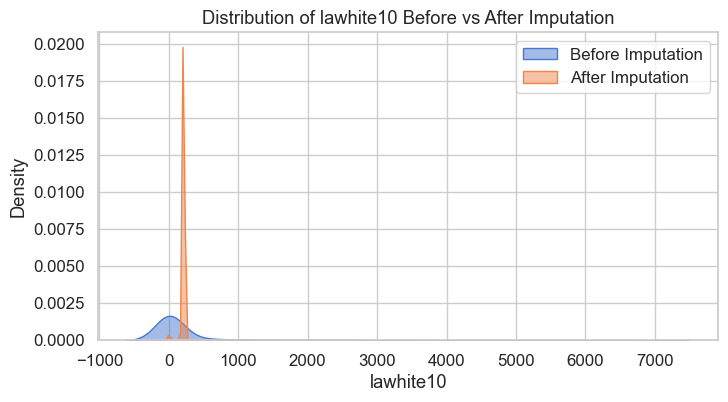

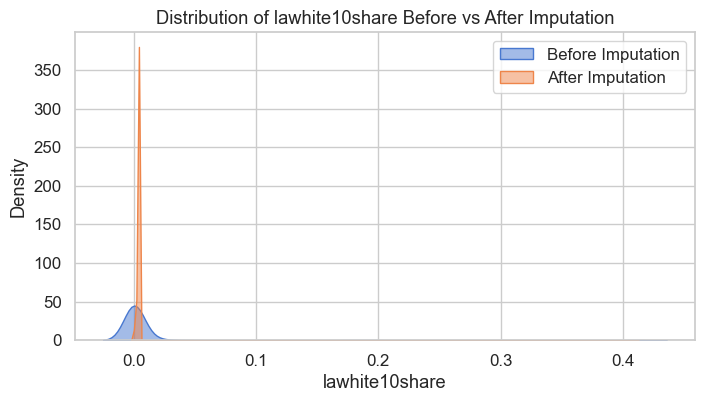

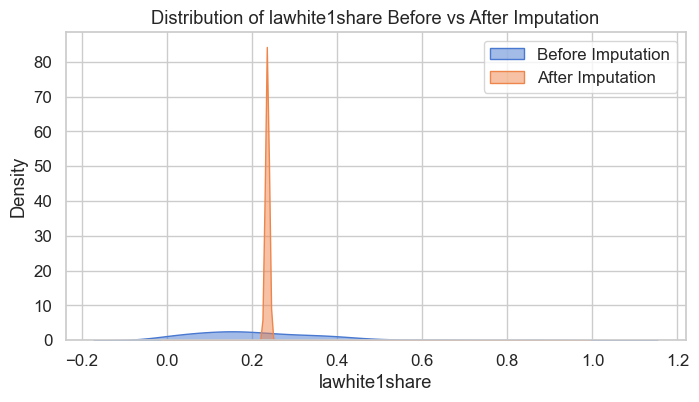

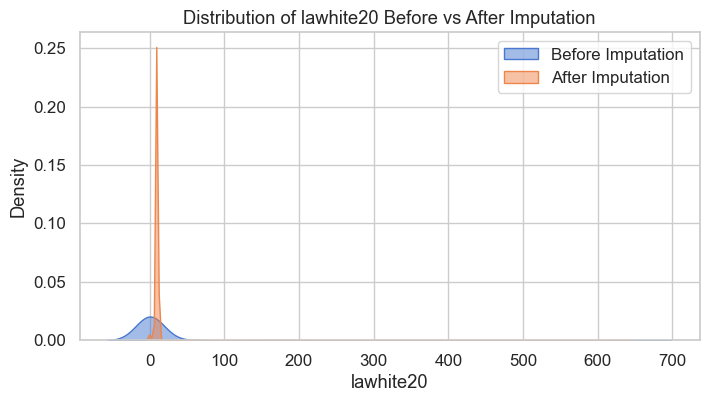

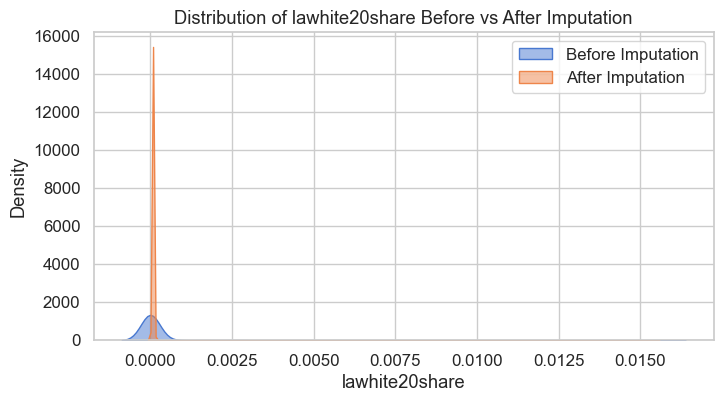

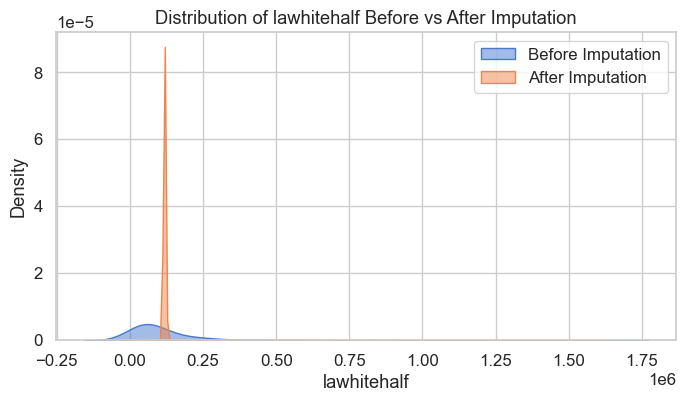

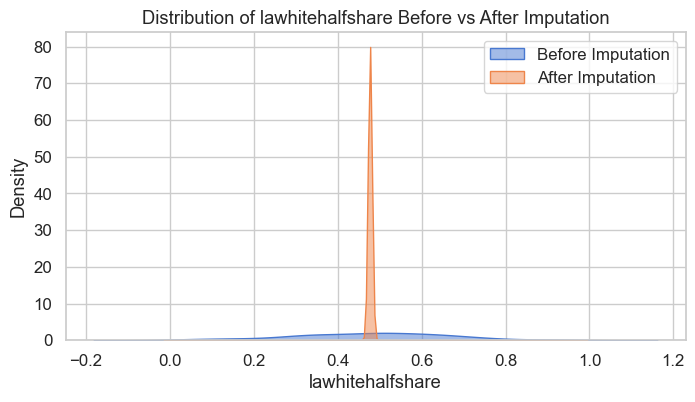

In [ ]:
# Visualize effect of Imputation
# Keep only numeric columns
numeric_cols = imputed_data.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data_subset[col], label='Before Imputation', fill=True, alpha=0.5)
    sns.kdeplot(imputed_data[col], label='After Imputation', fill=True, alpha=0.5)
    plt.title(f'Distribution of {col} Before vs After Imputation')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [66]:
# Scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# DataFrame with column names preserved
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_data.columns)


In [67]:
# PCA
pca = PCA(n_components=2)  # 2 components for easy plotting
data_pca = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])


In [68]:
from sklearn.cluster import AgglomerativeClustering

# Clustering
# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=7)
dbscan_labels = dbscan.fit_predict(data_pca)
pca_df['DBSCAN_cluster'] = dbscan_labels

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)
pca_df['KMeans_cluster'] = kmeans_labels

# Agglomerative Clustering (Ward linkage)
agg = AgglomerativeClustering(n_clusters=5, linkage='complete', metric='euclidean')
agg_labels = agg.fit_predict(data_pca)
pca_df['Agglomerative_cluster'] = agg_labels

# View results
print(pca_df.head())


        PC1       PC2  DBSCAN_cluster  KMeans_cluster  Agglomerative_cluster
0 -0.047090  0.009513               0               0                      0
1 -0.045538  0.002977               0               0                      0
2 -0.051726  0.008928               0               0                      0
3 -0.053444  0.016179               0               0                      0
4  0.050342 -0.004701               0               0                      0


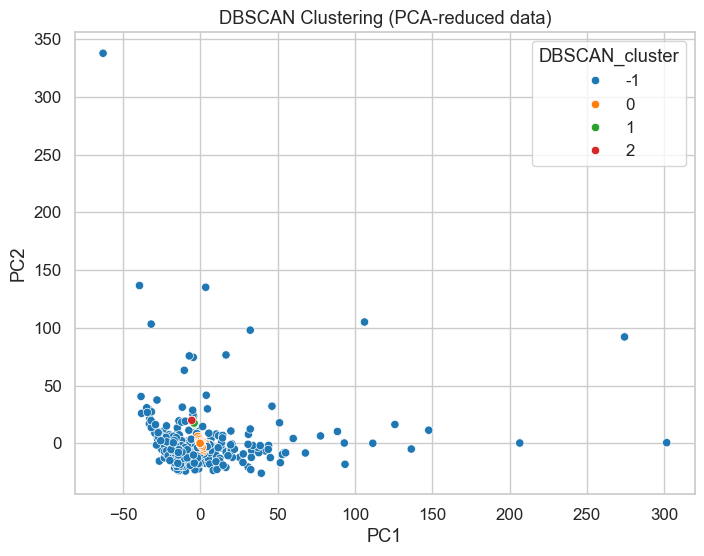

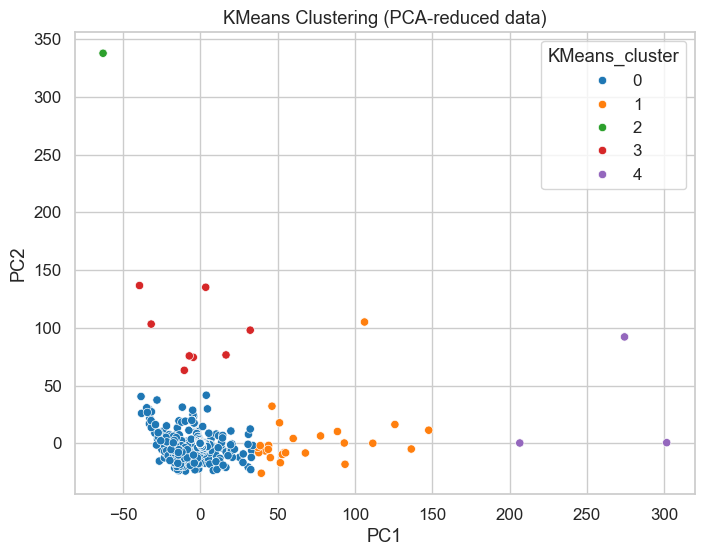

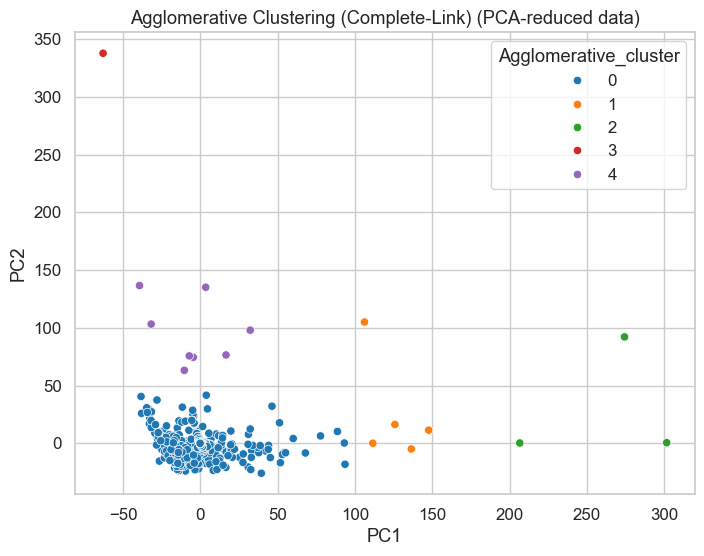

In [69]:
# Visualize

# Set a nice style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ---- DBSCAN Clusters ----
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='DBSCAN_cluster',
    palette='tab10',
    data=pca_df,
    legend='full'
)
plt.title('DBSCAN Clustering (PCA-reduced data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ---- KMeans Clusters ----
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='KMeans_cluster',
    palette='tab10',
    data=pca_df,
    legend='full'
)
plt.title('KMeans Clustering (PCA-reduced data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# ---- AgglomerativeClustering ----
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Agglomerative_cluster',
    palette='tab10',
    data=pca_df,
    legend='full'
)
plt.title("Agglomerative Clustering (Complete-Link) (PCA-reduced data)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [70]:
from sklearn.metrics import silhouette_score

# Only use points assigned to a cluster for DBSCAN (exclude noise labeled as -1)
mask = pca_df['DBSCAN_cluster'] != -1
dbscan_silhouette = silhouette_score(
    data_pca[mask], 
    pca_df.loc[mask, 'DBSCAN_cluster']
)
print(f"DBSCAN silhouette score (excluding noise): {dbscan_silhouette:.3f}")

# KMeans silhouette score (all points assigned)
kmeans_silhouette = silhouette_score(
    data_pca, 
    pca_df['KMeans_cluster']
)
print(f"KMeans silhouette score: {kmeans_silhouette:.3f}")

# AgglomerativeClustering silhouette score (all points assigned)
agglomerative_silhouette = silhouette_score(
    data_pca, 
    pca_df['Agglomerative_cluster']
)
print(f"Agglomerative silhouette score: {agglomerative_silhouette:.3f}")

DBSCAN silhouette score (excluding noise): 0.979
KMeans silhouette score: 0.980
Agglomerative silhouette score: 0.983


In [63]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(pca_df['DBSCAN_cluster'], pca_df['KMeans_cluster'])
ari_db_agg = adjusted_rand_score(pca_df['DBSCAN_cluster'], pca_df['Agglomerative_cluster'])
ari_km_agg = adjusted_rand_score(pca_df['KMeans_cluster'], pca_df['Agglomerative_cluster'])

print(f"ARI DBSCAN vs KMeans: {ari:.3f}")
print(f"ARI DBSCAN vs Agglomerative: {ari_db_agg:.3f}")
print(f"ARI KMeans vs Agglomerative: {ari_km_agg:.3f}")

ARI DBSCAN vs KMeans: 0.167
ARI DBSCAN vs Agglomerative: 0.080
ARI KMeans vs Agglomerative: 0.629


In [46]:
# adjust k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_k = None

for k in range(2, 11):  # typical range 2–10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, labels)
    print(f"k={k}, silhouette score={score:.3f}")
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best k={best_k} with silhouette score={best_score:.3f}")


k=2, silhouette score=0.989
k=3, silhouette score=0.989
k=4, silhouette score=0.984
k=5, silhouette score=0.980
k=6, silhouette score=0.951
k=7, silhouette score=0.953
k=8, silhouette score=0.955
k=9, silhouette score=0.955
k=10, silhouette score=0.956
Best k=3 with silhouette score=0.989


In [47]:
from sklearn.cluster import DBSCAN
import numpy as np

eps_values = np.arange(0.3, 1.1, 0.1)
min_samples_values = range(3, 8)

best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_pca)
        # Exclude noise points for silhouette score
        mask = labels != -1
        if np.sum(mask) < 2:  # silhouette requires at least 2 points
            continue
        score = silhouette_score(data_pca[mask], labels[mask])
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

print(f"Best DBSCAN params: eps={best_params[0]}, min_samples={best_params[1]}, silhouette={best_score:.3f}")


Best DBSCAN params: eps=0.8000000000000003, min_samples=7, silhouette=0.979


In [51]:
# assess agglomerative parameters to find optimal
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkage_options = ['ward', 'complete', 'average', 'single']
cluster_range = range(2, 11)  # try 2 to 10 clusters

best_score = -1
best_params = None

for linkage in linkage_options:
    for n_clusters in cluster_range:
        # Ward linkage only works with Euclidean distance
        if linkage == 'ward':
            agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        else:
            agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='euclidean')
        
        labels = agg.fit_predict(data_pca)
        score = silhouette_score(data_pca, labels)
        
        if score > best_score:
            best_score = score
            best_params = (linkage, n_clusters)

print(f"Best Agglomerative parameters: linkage={best_params[0]}, n_clusters={best_params[1]}, silhouette={best_score:.3f}")


Best Agglomerative parameters: linkage=complete, n_clusters=2, silhouette=0.994


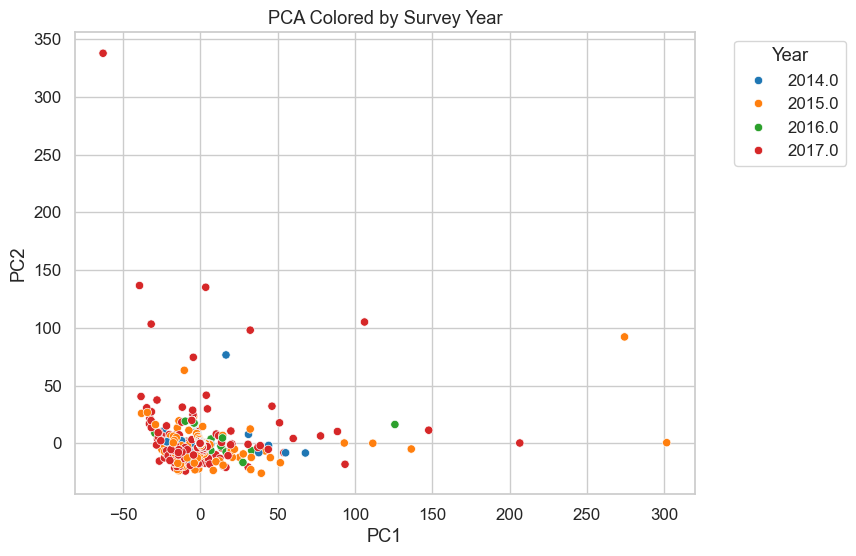

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue=data_subset['Survey_Year'],   # color by year
    palette='tab10',           # can change palette if many years
    data=pca_df,
    legend='full'
)
plt.title('PCA Colored by Survey Year')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [78]:
# color by location

# Make sure rows are aligned between data_subset and pca_df
pca_df['CountyFIPS'] = data_subset['CountyFIPS'].values

# Example state FIPS dictionary
state_dict = {
    '01':'ALABAMA', '02':'ALASKA', '04':'ARIZONA', '05':'ARKANSAS', '06':'CALIFORNIA',
    '08':'COLORADO', '09':'CONNECTICUT', '10':'DELAWARE', '11':'DISTRICT OF COLUMBIA',
    '12':'FLORIDA', '13':'GEORGIA', '15':'HAWAII', '16':'IDAHO', '17':'ILLINOIS',
    '18':'INDIANA', '19':'IOWA', '20':'KANSAS', '21':'KENTUCKY', '22':'LOUISIANA',
    '23':'MAINE', '24':'MARYLAND', '25':'MASSACHUSETTS', '26':'MICHIGAN', '27':'MINNESOTA',
    '28':'MISSISSIPPI', '29':'MISSOURI', '30':'MONTANA', '31':'NEBRASKA', '32':'NEVADA',
    '33':'NEW HAMPSHIRE', '34':'NEW JERSEY', '35':'NEW MEXICO', '36':'NEW YORK',
    '37':'NORTH CAROLINA', '38':'NORTH DAKOTA', '39':'OHIO', '40':'OKLAHOMA',
    '41':'OREGON', '42':'PENNSYLVANIA', '44':'RHODE ISLAND', '45':'SOUTH CAROLINA',
    '46':'SOUTH DAKOTA', '47':'TENNESSEE', '48':'TEXAS', '49':'UTAH', '50':'VERMONT',
    '51':'VIRGINIA', '53':'WASHINGTON', '54':'WEST VIRGINIA', '55':'WISCONSIN', '56':'WYOMING'
}

# Define regions
region_dict = {
    # Northeast
    'CONNECTICUT':'NORTHEAST','MAINE':'NORTHEAST','MASSACHUSETTS':'NORTHEAST',
    'NEW HAMPSHIRE':'NORTHEAST','NEW JERSEY':'NORTHEAST','NEW YORK':'NORTHEAST',
    'PENNSYLVANIA':'NORTHEAST','RHODE ISLAND':'NORTHEAST','VERMONT':'NORTHEAST',
    
    # Midwest
    'ILLINOIS':'MIDWEST','INDIANA':'MIDWEST','IOWA':'MIDWEST','KANSAS':'MIDWEST',
    'MICHIGAN':'MIDWEST','MINNESOTA':'MIDWEST','MISSOURI':'MIDWEST','NEBRASKA':'MIDWEST',
    'NORTH DAKOTA':'MIDWEST','OHIO':'MIDWEST','SOUTH DAKOTA':'MIDWEST','WISCONSIN':'MIDWEST',
    
    # South
    'DELAWARE':'SOUTH','FLORIDA':'SOUTH','GEORGIA':'SOUTH','MARYLAND':'SOUTH',
    'NORTH CAROLINA':'SOUTH','SOUTH CAROLINA':'SOUTH','VIRGINIA':'SOUTH','WEST VIRGINIA':'SOUTH',
    'ALABAMA':'SOUTH','KENTUCKY':'SOUTH','MISSISSIPPI':'SOUTH','TENNESSEE':'SOUTH',
    'ARKANSAS':'SOUTH','LOUISIANA':'SOUTH','OKLAHOMA':'SOUTH','TEXAS':'SOUTH',
    
    # West
    'ARIZONA':'WEST','COLORADO':'WEST','IDAHO':'WEST','MONTANA':'WEST','NEVADA':'WEST',
    'NEW MEXICO':'WEST','UTAH':'WEST','WYOMING':'WEST','ALASKA':'WEST','CALIFORNIA':'WEST',
    'HAWAII':'WEST','OREGON':'WEST','WASHINGTON':'WEST'
}

division_dict = {
    # Northeast - New England
    'MAINE':'New England','NEW HAMPSHIRE':'New England','VERMONT':'New England',
    'MASSACHUSETTS':'New England','RHODE ISLAND':'New England','CONNECTICUT':'New England',
    # Northeast - Middle Atlantic
    'NEW YORK':'Middle Atlantic','NEW JERSEY':'Middle Atlantic','PENNSYLVANIA':'Middle Atlantic',
    # Midwest - East North Central
    'OHIO':'East North Central','INDIANA':'East North Central','ILLINOIS':'East North Central',
    'MICHIGAN':'East North Central','WISCONSIN':'East North Central',
    # Midwest - West North Central
    'MINNESOTA':'West North Central','IOWA':'West North Central','MISSOURI':'West North Central',
    'NORTH DAKOTA':'West North Central','SOUTH DAKOTA':'West North Central',
    'NEBRASKA':'West North Central','KANSAS':'West North Central',
    # South - South Atlantic
    'DELAWARE':'South Atlantic','MARYLAND':'South Atlantic','DISTRICT OF COLUMBIA':'South Atlantic',
    'VIRGINIA':'South Atlantic','WEST VIRGINIA':'South Atlantic','NORTH CAROLINA':'South Atlantic',
    'SOUTH CAROLINA':'South Atlantic','GEORGIA':'South Atlantic','FLORIDA':'South Atlantic',
    # South - East South Central
    'KENTUCKY':'East South Central','TENNESSEE':'East South Central','MISSISSIPPI':'East South Central',
    'ALABAMA':'East South Central',
    # South - West South Central
    'OKLAHOMA':'West South Central','TEXAS':'West South Central','ARKANSAS':'West South Central',
    'LOUISIANA':'West South Central',
    # West - Mountain
    'MONTANA':'Mountain','IDAHO':'Mountain','WYOMING':'Mountain','NEVADA':'Mountain',
    'UTAH':'Mountain','COLORADO':'Mountain','ARIZONA':'Mountain','NEW MEXICO':'Mountain',
    # West - Pacific
    'WASHINGTON':'Pacific','OREGON':'Pacific','CALIFORNIA':'Pacific','ALASKA':'Pacific','HAWAII':'Pacific'
}

pca_df['Division'] = pca_df['State'].map(division_dict)


# Map state to region
pca_df['Region'] = pca_df['State'].map(region_dict)

# Extract state FIPS and map to state names
pca_df['StateFIPS'] = pca_df['CountyFIPS'].str[:2]          # first two characters
pca_df['State'] = pca_df['StateFIPS'].map(state_dict)


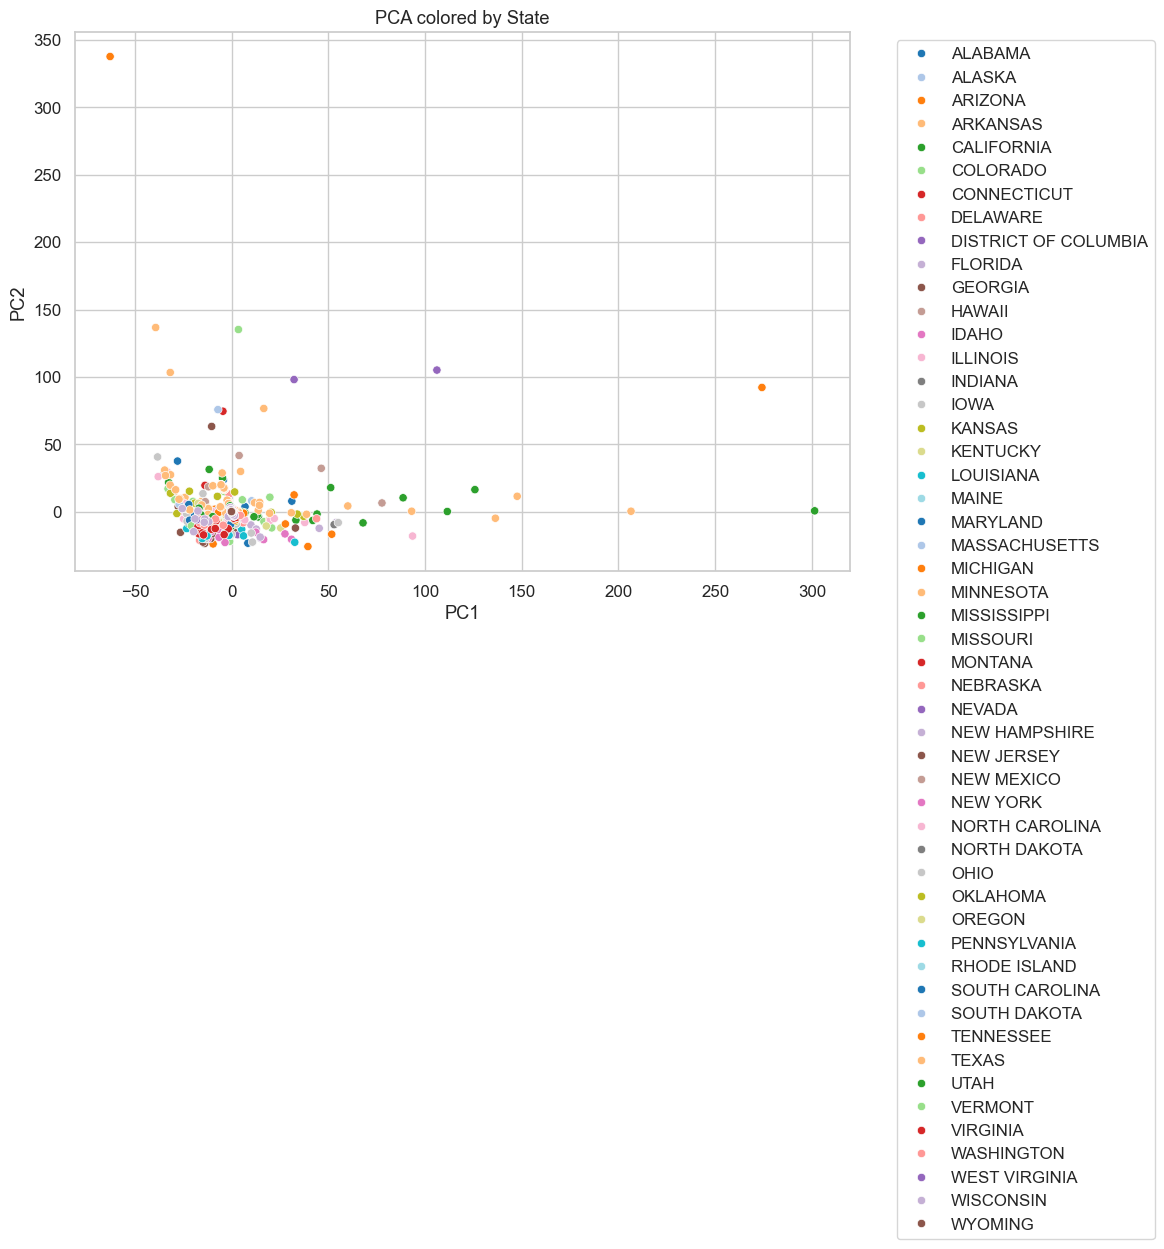

In [76]:

# Visualize PCA colored by state
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='State',
    data=pca_df,
    palette='tab20',  # change if you have more than 20 states
    legend='full'
)
plt.title('PCA colored by State')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


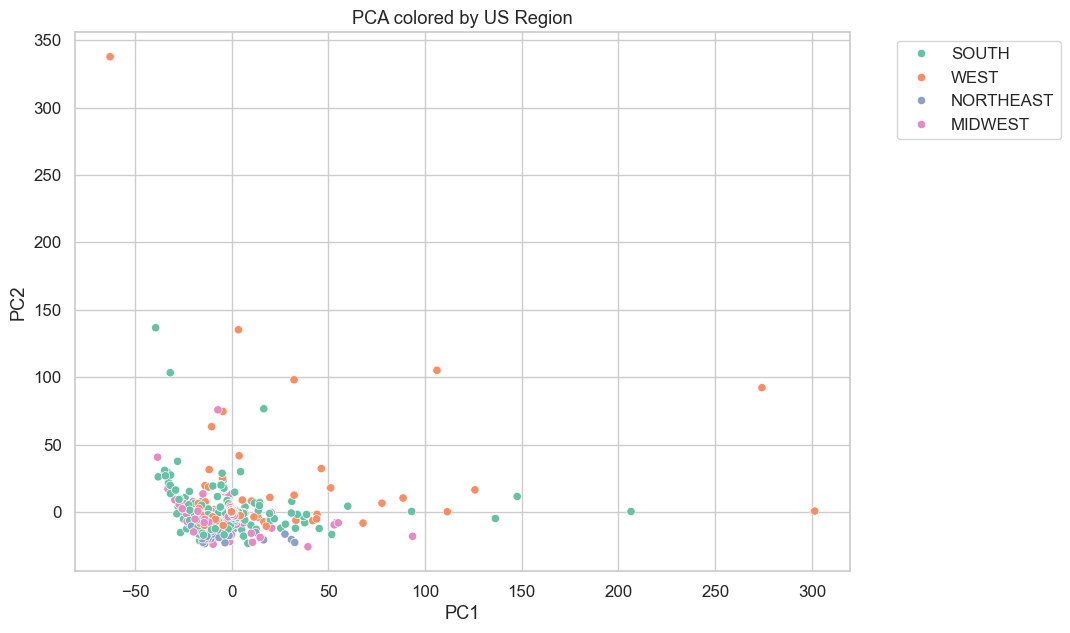

In [77]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Region',
    data=pca_df,
    palette='Set2',
    legend='full'
)
plt.title('PCA colored by US Region')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


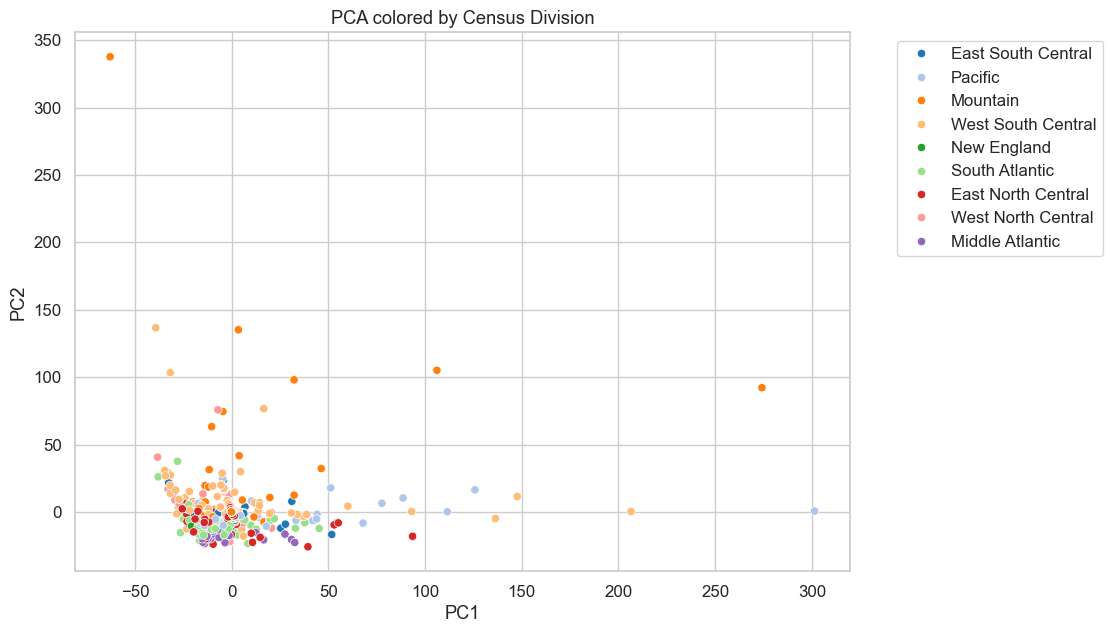

In [79]:
# by division

plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Division',
    data=pca_df,
    palette='tab20',
    legend='full'
)
plt.title('PCA colored by Census Division')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()
